# Fruits 360 Dataset Kaggle Competition

### Step 1: Explore Dataset
### Step 2: Preprocess Dataset
### Step 3: Create a Dataset Pipeline and Tensorflow Model
### Step 4: Training network
### Step 5: Printing the test accuracy and Troubleshooting. Target accuracy on test set should be more than >94%.

So lets begin!!

#### Step 1: Explore Dataset

(100, 100, 3)


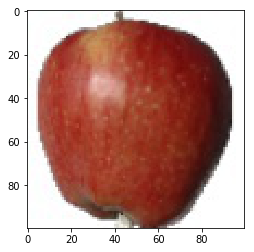

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# Following will create a numpy array for an image
img = mpimg.imread('./fruits-360/Training/Apple Red 1/101_100.jpg')
print(img.shape)
# Display image using matplotlib from a numpy array
plt.imshow(img)

No. of Training Samples: 41322
No. of Test Samples: 13877


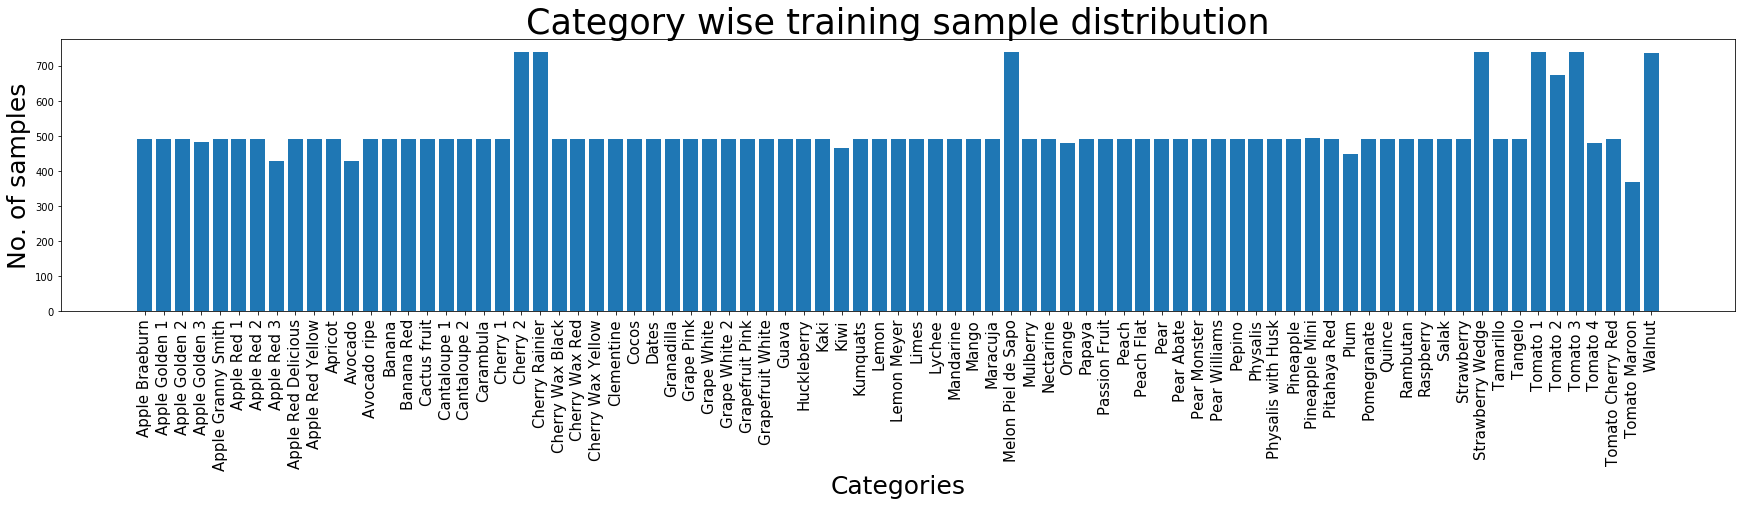

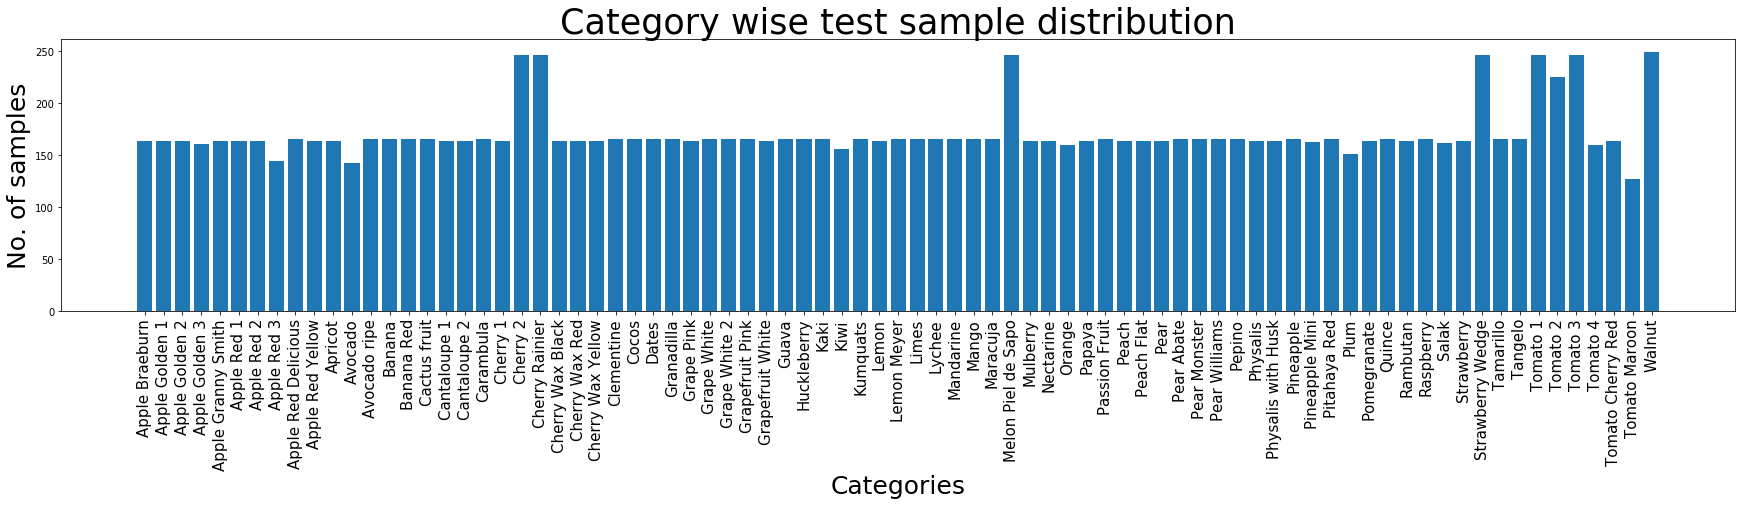

In [2]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("./fruits-360/Training"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("./fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("./fruits-360/Test"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("./fruits-360/Test/"+ i)))

    
print("No. of Training Samples:", sum(train_samples))
print("No. of Test Samples:", sum(test_samples))


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Category wise training sample distribution', fontsize=35)
plt.show()


index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Category wise test sample distribution', fontsize=35)
plt.show()

#### Step 2: Preprocess Dataset

In [3]:
# Convert all the training and test set into a numpy array
# X will be the image array 3 dimensional and Y will be the one hot encoded vector 1x81 dimension
train = []
test = []

for i in os.listdir("./fruits-360/Training"):
    one_hot = np.zeros(shape=[len(train_categories)])
    actual_index = train_categories.index(i)
    one_hot[actual_index] = 1
    for files in os.listdir("./fruits-360/Training/"+ i):
        img_array = mpimg.imread("./fruits-360/Training/"+ i + "/" + files)
        train.append([img_array, one_hot])
    print("Train Category Status: {}/{}".format(actual_index+1, len(train_categories)))
    
for i in os.listdir("./fruits-360/Test"):
    one_hot = np.zeros(shape=[len(test_categories)])
    actual_index = test_categories.index(i)
    one_hot[actual_index] = 1
    for files in os.listdir("./fruits-360/Test/"+ i):
        img_array = mpimg.imread("./fruits-360/Test/"+ i + "/" + files)
        test.append([img_array, one_hot])
    print("Test Category Status: {}/{}".format(actual_index+1, len(test_categories)))

Train Category Status: 1/81
Train Category Status: 2/81
Train Category Status: 3/81
Train Category Status: 4/81
Train Category Status: 5/81
Train Category Status: 6/81
Train Category Status: 7/81
Train Category Status: 8/81
Train Category Status: 9/81
Train Category Status: 10/81
Train Category Status: 11/81
Train Category Status: 12/81
Train Category Status: 13/81
Train Category Status: 14/81
Train Category Status: 15/81
Train Category Status: 16/81
Train Category Status: 17/81
Train Category Status: 18/81
Train Category Status: 19/81
Train Category Status: 20/81
Train Category Status: 21/81
Train Category Status: 22/81
Train Category Status: 23/81
Train Category Status: 24/81
Train Category Status: 25/81
Train Category Status: 26/81
Train Category Status: 27/81
Train Category Status: 28/81
Train Category Status: 29/81
Train Category Status: 30/81
Train Category Status: 31/81
Train Category Status: 32/81
Train Category Status: 33/81
Train Category Status: 34/81
Train Category Status: 

In [4]:
# Shuffle the datasets before spliting into x and y.

import random
random.shuffle(train)
random.shuffle(test)

Granadilla


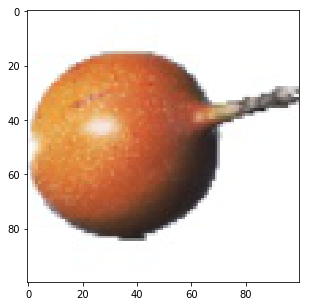

In [5]:
x = train[17000][0]
y = train[17000][1]
plt.imshow(x)
print(train_categories[np.argmax(y)])

Clementine


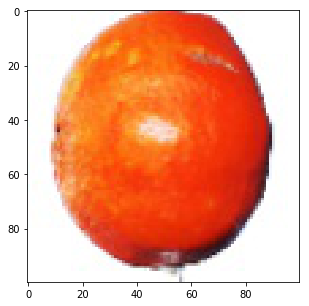

In [6]:
x_ = test[7000][0]
y_ = test[7000][1]
plt.imshow(x_)
print(test_categories[np.argmax(y_)])

In [7]:
train_x = []
train_y = []
for i in range(len(train)):
    train_x.append(train[i][0])
    train_y.append(train[i][1])
    print("Status {}/{}".format(i+1, len(train)))

Status 1/41322
Status 2/41322
Status 3/41322
Status 4/41322
Status 5/41322
Status 6/41322
Status 7/41322
Status 8/41322
Status 9/41322
Status 10/41322
Status 11/41322
Status 12/41322
Status 13/41322
Status 14/41322
Status 15/41322
Status 16/41322
Status 17/41322
Status 18/41322
Status 19/41322
Status 20/41322
Status 21/41322
Status 22/41322
Status 23/41322
Status 24/41322
Status 25/41322
Status 26/41322
Status 27/41322
Status 28/41322
Status 29/41322
Status 30/41322
Status 31/41322
Status 32/41322
Status 33/41322
Status 34/41322
Status 35/41322
Status 36/41322
Status 37/41322
Status 38/41322
Status 39/41322
Status 40/41322
Status 41/41322
Status 42/41322
Status 43/41322
Status 44/41322
Status 45/41322
Status 46/41322
Status 47/41322
Status 48/41322
Status 49/41322
Status 50/41322
Status 51/41322
Status 52/41322
Status 53/41322
Status 54/41322
Status 55/41322
Status 56/41322
Status 57/41322
Status 58/41322
Status 59/41322
Status 60/41322
Status 61/41322
Status 62/41322
Status 63/41322
S

Status 3186/41322
Status 3187/41322
Status 3188/41322
Status 3189/41322
Status 3190/41322
Status 3191/41322
Status 3192/41322
Status 3193/41322
Status 3194/41322
Status 3195/41322
Status 3196/41322
Status 3197/41322
Status 3198/41322
Status 3199/41322
Status 3200/41322
Status 3201/41322
Status 3202/41322
Status 3203/41322
Status 3204/41322
Status 3205/41322
Status 3206/41322
Status 3207/41322
Status 3208/41322
Status 3209/41322
Status 3210/41322
Status 3211/41322
Status 3212/41322
Status 3213/41322
Status 3214/41322
Status 3215/41322
Status 3216/41322
Status 3217/41322
Status 3218/41322
Status 3219/41322
Status 3220/41322
Status 3221/41322
Status 3222/41322
Status 3223/41322
Status 3224/41322
Status 3225/41322
Status 3226/41322
Status 3227/41322
Status 3228/41322
Status 3229/41322
Status 3230/41322
Status 3231/41322
Status 3232/41322
Status 3233/41322
Status 3234/41322
Status 3235/41322
Status 3236/41322
Status 3237/41322
Status 3238/41322
Status 3239/41322
Status 3240/41322
Status 324

Status 5686/41322
Status 5687/41322
Status 5688/41322
Status 5689/41322
Status 5690/41322
Status 5691/41322
Status 5692/41322
Status 5693/41322
Status 5694/41322
Status 5695/41322
Status 5696/41322
Status 5697/41322
Status 5698/41322
Status 5699/41322
Status 5700/41322
Status 5701/41322
Status 5702/41322
Status 5703/41322
Status 5704/41322
Status 5705/41322
Status 5706/41322
Status 5707/41322
Status 5708/41322
Status 5709/41322
Status 5710/41322
Status 5711/41322
Status 5712/41322
Status 5713/41322
Status 5714/41322
Status 5715/41322
Status 5716/41322
Status 5717/41322
Status 5718/41322
Status 5719/41322
Status 5720/41322
Status 5721/41322
Status 5722/41322
Status 5723/41322
Status 5724/41322
Status 5725/41322
Status 5726/41322
Status 5727/41322
Status 5728/41322
Status 5729/41322
Status 5730/41322
Status 5731/41322
Status 5732/41322
Status 5733/41322
Status 5734/41322
Status 5735/41322
Status 5736/41322
Status 5737/41322
Status 5738/41322
Status 5739/41322
Status 5740/41322
Status 574

Status 8185/41322
Status 8186/41322
Status 8187/41322
Status 8188/41322
Status 8189/41322
Status 8190/41322
Status 8191/41322
Status 8192/41322
Status 8193/41322
Status 8194/41322
Status 8195/41322
Status 8196/41322
Status 8197/41322
Status 8198/41322
Status 8199/41322
Status 8200/41322
Status 8201/41322
Status 8202/41322
Status 8203/41322
Status 8204/41322
Status 8205/41322
Status 8206/41322
Status 8207/41322
Status 8208/41322
Status 8209/41322
Status 8210/41322
Status 8211/41322
Status 8212/41322
Status 8213/41322
Status 8214/41322
Status 8215/41322
Status 8216/41322
Status 8217/41322
Status 8218/41322
Status 8219/41322
Status 8220/41322
Status 8221/41322
Status 8222/41322
Status 8223/41322
Status 8224/41322
Status 8225/41322
Status 8226/41322
Status 8227/41322
Status 8228/41322
Status 8229/41322
Status 8230/41322
Status 8231/41322
Status 8232/41322
Status 8233/41322
Status 8234/41322
Status 8235/41322
Status 8236/41322
Status 8237/41322
Status 8238/41322
Status 8239/41322
Status 824

Status 10685/41322
Status 10686/41322
Status 10687/41322
Status 10688/41322
Status 10689/41322
Status 10690/41322
Status 10691/41322
Status 10692/41322
Status 10693/41322
Status 10694/41322
Status 10695/41322
Status 10696/41322
Status 10697/41322
Status 10698/41322
Status 10699/41322
Status 10700/41322
Status 10701/41322
Status 10702/41322
Status 10703/41322
Status 10704/41322
Status 10705/41322
Status 10706/41322
Status 10707/41322
Status 10708/41322
Status 10709/41322
Status 10710/41322
Status 10711/41322
Status 10712/41322
Status 10713/41322
Status 10714/41322
Status 10715/41322
Status 10716/41322
Status 10717/41322
Status 10718/41322
Status 10719/41322
Status 10720/41322
Status 10721/41322
Status 10722/41322
Status 10723/41322
Status 10724/41322
Status 10725/41322
Status 10726/41322
Status 10727/41322
Status 10728/41322
Status 10729/41322
Status 10730/41322
Status 10731/41322
Status 10732/41322
Status 10733/41322
Status 10734/41322
Status 10735/41322
Status 10736/41322
Status 10737

Status 13184/41322
Status 13185/41322
Status 13186/41322
Status 13187/41322
Status 13188/41322
Status 13189/41322
Status 13190/41322
Status 13191/41322
Status 13192/41322
Status 13193/41322
Status 13194/41322
Status 13195/41322
Status 13196/41322
Status 13197/41322
Status 13198/41322
Status 13199/41322
Status 13200/41322
Status 13201/41322
Status 13202/41322
Status 13203/41322
Status 13204/41322
Status 13205/41322
Status 13206/41322
Status 13207/41322
Status 13208/41322
Status 13209/41322
Status 13210/41322
Status 13211/41322
Status 13212/41322
Status 13213/41322
Status 13214/41322
Status 13215/41322
Status 13216/41322
Status 13217/41322
Status 13218/41322
Status 13219/41322
Status 13220/41322
Status 13221/41322
Status 13222/41322
Status 13223/41322
Status 13224/41322
Status 13225/41322
Status 13226/41322
Status 13227/41322
Status 13228/41322
Status 13229/41322
Status 13230/41322
Status 13231/41322
Status 13232/41322
Status 13233/41322
Status 13234/41322
Status 13235/41322
Status 13236

Status 15684/41322
Status 15685/41322
Status 15686/41322
Status 15687/41322
Status 15688/41322
Status 15689/41322
Status 15690/41322
Status 15691/41322
Status 15692/41322
Status 15693/41322
Status 15694/41322
Status 15695/41322
Status 15696/41322
Status 15697/41322
Status 15698/41322
Status 15699/41322
Status 15700/41322
Status 15701/41322
Status 15702/41322
Status 15703/41322
Status 15704/41322
Status 15705/41322
Status 15706/41322
Status 15707/41322
Status 15708/41322
Status 15709/41322
Status 15710/41322
Status 15711/41322
Status 15712/41322
Status 15713/41322
Status 15714/41322
Status 15715/41322
Status 15716/41322
Status 15717/41322
Status 15718/41322
Status 15719/41322
Status 15720/41322
Status 15721/41322
Status 15722/41322
Status 15723/41322
Status 15724/41322
Status 15725/41322
Status 15726/41322
Status 15727/41322
Status 15728/41322
Status 15729/41322
Status 15730/41322
Status 15731/41322
Status 15732/41322
Status 15733/41322
Status 15734/41322
Status 15735/41322
Status 15736

Status 18011/41322
Status 18012/41322
Status 18013/41322
Status 18014/41322
Status 18015/41322
Status 18016/41322
Status 18017/41322
Status 18018/41322
Status 18019/41322
Status 18020/41322
Status 18021/41322
Status 18022/41322
Status 18023/41322
Status 18024/41322
Status 18025/41322
Status 18026/41322
Status 18027/41322
Status 18028/41322
Status 18029/41322
Status 18030/41322
Status 18031/41322
Status 18032/41322
Status 18033/41322
Status 18034/41322
Status 18035/41322
Status 18036/41322
Status 18037/41322
Status 18038/41322
Status 18039/41322
Status 18040/41322
Status 18041/41322
Status 18042/41322
Status 18043/41322
Status 18044/41322
Status 18045/41322
Status 18046/41322
Status 18047/41322
Status 18048/41322
Status 18049/41322
Status 18050/41322
Status 18051/41322
Status 18052/41322
Status 18053/41322
Status 18054/41322
Status 18055/41322
Status 18056/41322
Status 18057/41322
Status 18058/41322
Status 18059/41322
Status 18060/41322
Status 18061/41322
Status 18062/41322
Status 18063

Status 20183/41322
Status 20184/41322
Status 20185/41322
Status 20186/41322
Status 20187/41322
Status 20188/41322
Status 20189/41322
Status 20190/41322
Status 20191/41322
Status 20192/41322
Status 20193/41322
Status 20194/41322
Status 20195/41322
Status 20196/41322
Status 20197/41322
Status 20198/41322
Status 20199/41322
Status 20200/41322
Status 20201/41322
Status 20202/41322
Status 20203/41322
Status 20204/41322
Status 20205/41322
Status 20206/41322
Status 20207/41322
Status 20208/41322
Status 20209/41322
Status 20210/41322
Status 20211/41322
Status 20212/41322
Status 20213/41322
Status 20214/41322
Status 20215/41322
Status 20216/41322
Status 20217/41322
Status 20218/41322
Status 20219/41322
Status 20220/41322
Status 20221/41322
Status 20222/41322
Status 20223/41322
Status 20224/41322
Status 20225/41322
Status 20226/41322
Status 20227/41322
Status 20228/41322
Status 20229/41322
Status 20230/41322
Status 20231/41322
Status 20232/41322
Status 20233/41322
Status 20234/41322
Status 20235

Status 22682/41322
Status 22683/41322
Status 22684/41322
Status 22685/41322
Status 22686/41322
Status 22687/41322
Status 22688/41322
Status 22689/41322
Status 22690/41322
Status 22691/41322
Status 22692/41322
Status 22693/41322
Status 22694/41322
Status 22695/41322
Status 22696/41322
Status 22697/41322
Status 22698/41322
Status 22699/41322
Status 22700/41322
Status 22701/41322
Status 22702/41322
Status 22703/41322
Status 22704/41322
Status 22705/41322
Status 22706/41322
Status 22707/41322
Status 22708/41322
Status 22709/41322
Status 22710/41322
Status 22711/41322
Status 22712/41322
Status 22713/41322
Status 22714/41322
Status 22715/41322
Status 22716/41322
Status 22717/41322
Status 22718/41322
Status 22719/41322
Status 22720/41322
Status 22721/41322
Status 22722/41322
Status 22723/41322
Status 22724/41322
Status 22725/41322
Status 22726/41322
Status 22727/41322
Status 22728/41322
Status 22729/41322
Status 22730/41322
Status 22731/41322
Status 22732/41322
Status 22733/41322
Status 22734

Status 25182/41322
Status 25183/41322
Status 25184/41322
Status 25185/41322
Status 25186/41322
Status 25187/41322
Status 25188/41322
Status 25189/41322
Status 25190/41322
Status 25191/41322
Status 25192/41322
Status 25193/41322
Status 25194/41322
Status 25195/41322
Status 25196/41322
Status 25197/41322
Status 25198/41322
Status 25199/41322
Status 25200/41322
Status 25201/41322
Status 25202/41322
Status 25203/41322
Status 25204/41322
Status 25205/41322
Status 25206/41322
Status 25207/41322
Status 25208/41322
Status 25209/41322
Status 25210/41322
Status 25211/41322
Status 25212/41322
Status 25213/41322
Status 25214/41322
Status 25215/41322
Status 25216/41322
Status 25217/41322
Status 25218/41322
Status 25219/41322
Status 25220/41322
Status 25221/41322
Status 25222/41322
Status 25223/41322
Status 25224/41322
Status 25225/41322
Status 25226/41322
Status 25227/41322
Status 25228/41322
Status 25229/41322
Status 25230/41322
Status 25231/41322
Status 25232/41322
Status 25233/41322
Status 25234

Status 27681/41322
Status 27682/41322
Status 27683/41322
Status 27684/41322
Status 27685/41322
Status 27686/41322
Status 27687/41322
Status 27688/41322
Status 27689/41322
Status 27690/41322
Status 27691/41322
Status 27692/41322
Status 27693/41322
Status 27694/41322
Status 27695/41322
Status 27696/41322
Status 27697/41322
Status 27698/41322
Status 27699/41322
Status 27700/41322
Status 27701/41322
Status 27702/41322
Status 27703/41322
Status 27704/41322
Status 27705/41322
Status 27706/41322
Status 27707/41322
Status 27708/41322
Status 27709/41322
Status 27710/41322
Status 27711/41322
Status 27712/41322
Status 27713/41322
Status 27714/41322
Status 27715/41322
Status 27716/41322
Status 27717/41322
Status 27718/41322
Status 27719/41322
Status 27720/41322
Status 27721/41322
Status 27722/41322
Status 27723/41322
Status 27724/41322
Status 27725/41322
Status 27726/41322
Status 27727/41322
Status 27728/41322
Status 27729/41322
Status 27730/41322
Status 27731/41322
Status 27732/41322
Status 27733

Status 30181/41322
Status 30182/41322
Status 30183/41322
Status 30184/41322
Status 30185/41322
Status 30186/41322
Status 30187/41322
Status 30188/41322
Status 30189/41322
Status 30190/41322
Status 30191/41322
Status 30192/41322
Status 30193/41322
Status 30194/41322
Status 30195/41322
Status 30196/41322
Status 30197/41322
Status 30198/41322
Status 30199/41322
Status 30200/41322
Status 30201/41322
Status 30202/41322
Status 30203/41322
Status 30204/41322
Status 30205/41322
Status 30206/41322
Status 30207/41322
Status 30208/41322
Status 30209/41322
Status 30210/41322
Status 30211/41322
Status 30212/41322
Status 30213/41322
Status 30214/41322
Status 30215/41322
Status 30216/41322
Status 30217/41322
Status 30218/41322
Status 30219/41322
Status 30220/41322
Status 30221/41322
Status 30222/41322
Status 30223/41322
Status 30224/41322
Status 30225/41322
Status 30226/41322
Status 30227/41322
Status 30228/41322
Status 30229/41322
Status 30230/41322
Status 30231/41322
Status 30232/41322
Status 30233

Status 32680/41322
Status 32681/41322
Status 32682/41322
Status 32683/41322
Status 32684/41322
Status 32685/41322
Status 32686/41322
Status 32687/41322
Status 32688/41322
Status 32689/41322
Status 32690/41322
Status 32691/41322
Status 32692/41322
Status 32693/41322
Status 32694/41322
Status 32695/41322
Status 32696/41322
Status 32697/41322
Status 32698/41322
Status 32699/41322
Status 32700/41322
Status 32701/41322
Status 32702/41322
Status 32703/41322
Status 32704/41322
Status 32705/41322
Status 32706/41322
Status 32707/41322
Status 32708/41322
Status 32709/41322
Status 32710/41322
Status 32711/41322
Status 32712/41322
Status 32713/41322
Status 32714/41322
Status 32715/41322
Status 32716/41322
Status 32717/41322
Status 32718/41322
Status 32719/41322
Status 32720/41322
Status 32721/41322
Status 32722/41322
Status 32723/41322
Status 32724/41322
Status 32725/41322
Status 32726/41322
Status 32727/41322
Status 32728/41322
Status 32729/41322
Status 32730/41322
Status 32731/41322
Status 32732

Status 35180/41322
Status 35181/41322
Status 35182/41322
Status 35183/41322
Status 35184/41322
Status 35185/41322
Status 35186/41322
Status 35187/41322
Status 35188/41322
Status 35189/41322
Status 35190/41322
Status 35191/41322
Status 35192/41322
Status 35193/41322
Status 35194/41322
Status 35195/41322
Status 35196/41322
Status 35197/41322
Status 35198/41322
Status 35199/41322
Status 35200/41322
Status 35201/41322
Status 35202/41322
Status 35203/41322
Status 35204/41322
Status 35205/41322
Status 35206/41322
Status 35207/41322
Status 35208/41322
Status 35209/41322
Status 35210/41322
Status 35211/41322
Status 35212/41322
Status 35213/41322
Status 35214/41322
Status 35215/41322
Status 35216/41322
Status 35217/41322
Status 35218/41322
Status 35219/41322
Status 35220/41322
Status 35221/41322
Status 35222/41322
Status 35223/41322
Status 35224/41322
Status 35225/41322
Status 35226/41322
Status 35227/41322
Status 35228/41322
Status 35229/41322
Status 35230/41322
Status 35231/41322
Status 35232

Status 37679/41322
Status 37680/41322
Status 37681/41322
Status 37682/41322
Status 37683/41322
Status 37684/41322
Status 37685/41322
Status 37686/41322
Status 37687/41322
Status 37688/41322
Status 37689/41322
Status 37690/41322
Status 37691/41322
Status 37692/41322
Status 37693/41322
Status 37694/41322
Status 37695/41322
Status 37696/41322
Status 37697/41322
Status 37698/41322
Status 37699/41322
Status 37700/41322
Status 37701/41322
Status 37702/41322
Status 37703/41322
Status 37704/41322
Status 37705/41322
Status 37706/41322
Status 37707/41322
Status 37708/41322
Status 37709/41322
Status 37710/41322
Status 37711/41322
Status 37712/41322
Status 37713/41322
Status 37714/41322
Status 37715/41322
Status 37716/41322
Status 37717/41322
Status 37718/41322
Status 37719/41322
Status 37720/41322
Status 37721/41322
Status 37722/41322
Status 37723/41322
Status 37724/41322
Status 37725/41322
Status 37726/41322
Status 37727/41322
Status 37728/41322
Status 37729/41322
Status 37730/41322
Status 37731

Status 40179/41322
Status 40180/41322
Status 40181/41322
Status 40182/41322
Status 40183/41322
Status 40184/41322
Status 40185/41322
Status 40186/41322
Status 40187/41322
Status 40188/41322
Status 40189/41322
Status 40190/41322
Status 40191/41322
Status 40192/41322
Status 40193/41322
Status 40194/41322
Status 40195/41322
Status 40196/41322
Status 40197/41322
Status 40198/41322
Status 40199/41322
Status 40200/41322
Status 40201/41322
Status 40202/41322
Status 40203/41322
Status 40204/41322
Status 40205/41322
Status 40206/41322
Status 40207/41322
Status 40208/41322
Status 40209/41322
Status 40210/41322
Status 40211/41322
Status 40212/41322
Status 40213/41322
Status 40214/41322
Status 40215/41322
Status 40216/41322
Status 40217/41322
Status 40218/41322
Status 40219/41322
Status 40220/41322
Status 40221/41322
Status 40222/41322
Status 40223/41322
Status 40224/41322
Status 40225/41322
Status 40226/41322
Status 40227/41322
Status 40228/41322
Status 40229/41322
Status 40230/41322
Status 40231

In [8]:
test_x = []
test_y = []
for i in range(len(test)):
    test_x.append(test[i][0])
    test_y.append(test[i][1])
    print("Status {}/{}".format(i+1, len(test)))

Status 1/13877
Status 2/13877
Status 3/13877
Status 4/13877
Status 5/13877
Status 6/13877
Status 7/13877
Status 8/13877
Status 9/13877
Status 10/13877
Status 11/13877
Status 12/13877
Status 13/13877
Status 14/13877
Status 15/13877
Status 16/13877
Status 17/13877
Status 18/13877
Status 19/13877
Status 20/13877
Status 21/13877
Status 22/13877
Status 23/13877
Status 24/13877
Status 25/13877
Status 26/13877
Status 27/13877
Status 28/13877
Status 29/13877
Status 30/13877
Status 31/13877
Status 32/13877
Status 33/13877
Status 34/13877
Status 35/13877
Status 36/13877
Status 37/13877
Status 38/13877
Status 39/13877
Status 40/13877
Status 41/13877
Status 42/13877
Status 43/13877
Status 44/13877
Status 45/13877
Status 46/13877
Status 47/13877
Status 48/13877
Status 49/13877
Status 50/13877
Status 51/13877
Status 52/13877
Status 53/13877
Status 54/13877
Status 55/13877
Status 56/13877
Status 57/13877
Status 58/13877
Status 59/13877
Status 60/13877
Status 61/13877
Status 62/13877
Status 63/13877
S

Status 2850/13877
Status 2851/13877
Status 2852/13877
Status 2853/13877
Status 2854/13877
Status 2855/13877
Status 2856/13877
Status 2857/13877
Status 2858/13877
Status 2859/13877
Status 2860/13877
Status 2861/13877
Status 2862/13877
Status 2863/13877
Status 2864/13877
Status 2865/13877
Status 2866/13877
Status 2867/13877
Status 2868/13877
Status 2869/13877
Status 2870/13877
Status 2871/13877
Status 2872/13877
Status 2873/13877
Status 2874/13877
Status 2875/13877
Status 2876/13877
Status 2877/13877
Status 2878/13877
Status 2879/13877
Status 2880/13877
Status 2881/13877
Status 2882/13877
Status 2883/13877
Status 2884/13877
Status 2885/13877
Status 2886/13877
Status 2887/13877
Status 2888/13877
Status 2889/13877
Status 2890/13877
Status 2891/13877
Status 2892/13877
Status 2893/13877
Status 2894/13877
Status 2895/13877
Status 2896/13877
Status 2897/13877
Status 2898/13877
Status 2899/13877
Status 2900/13877
Status 2901/13877
Status 2902/13877
Status 2903/13877
Status 2904/13877
Status 290

Status 5350/13877
Status 5351/13877
Status 5352/13877
Status 5353/13877
Status 5354/13877
Status 5355/13877
Status 5356/13877
Status 5357/13877
Status 5358/13877
Status 5359/13877
Status 5360/13877
Status 5361/13877
Status 5362/13877
Status 5363/13877
Status 5364/13877
Status 5365/13877
Status 5366/13877
Status 5367/13877
Status 5368/13877
Status 5369/13877
Status 5370/13877
Status 5371/13877
Status 5372/13877
Status 5373/13877
Status 5374/13877
Status 5375/13877
Status 5376/13877
Status 5377/13877
Status 5378/13877
Status 5379/13877
Status 5380/13877
Status 5381/13877
Status 5382/13877
Status 5383/13877
Status 5384/13877
Status 5385/13877
Status 5386/13877
Status 5387/13877
Status 5388/13877
Status 5389/13877
Status 5390/13877
Status 5391/13877
Status 5392/13877
Status 5393/13877
Status 5394/13877
Status 5395/13877
Status 5396/13877
Status 5397/13877
Status 5398/13877
Status 5399/13877
Status 5400/13877
Status 5401/13877
Status 5402/13877
Status 5403/13877
Status 5404/13877
Status 540

Status 7849/13877
Status 7850/13877
Status 7851/13877
Status 7852/13877
Status 7853/13877
Status 7854/13877
Status 7855/13877
Status 7856/13877
Status 7857/13877
Status 7858/13877
Status 7859/13877
Status 7860/13877
Status 7861/13877
Status 7862/13877
Status 7863/13877
Status 7864/13877
Status 7865/13877
Status 7866/13877
Status 7867/13877
Status 7868/13877
Status 7869/13877
Status 7870/13877
Status 7871/13877
Status 7872/13877
Status 7873/13877
Status 7874/13877
Status 7875/13877
Status 7876/13877
Status 7877/13877
Status 7878/13877
Status 7879/13877
Status 7880/13877
Status 7881/13877
Status 7882/13877
Status 7883/13877
Status 7884/13877
Status 7885/13877
Status 7886/13877
Status 7887/13877
Status 7888/13877
Status 7889/13877
Status 7890/13877
Status 7891/13877
Status 7892/13877
Status 7893/13877
Status 7894/13877
Status 7895/13877
Status 7896/13877
Status 7897/13877
Status 7898/13877
Status 7899/13877
Status 7900/13877
Status 7901/13877
Status 7902/13877
Status 7903/13877
Status 790

Status 10349/13877
Status 10350/13877
Status 10351/13877
Status 10352/13877
Status 10353/13877
Status 10354/13877
Status 10355/13877
Status 10356/13877
Status 10357/13877
Status 10358/13877
Status 10359/13877
Status 10360/13877
Status 10361/13877
Status 10362/13877
Status 10363/13877
Status 10364/13877
Status 10365/13877
Status 10366/13877
Status 10367/13877
Status 10368/13877
Status 10369/13877
Status 10370/13877
Status 10371/13877
Status 10372/13877
Status 10373/13877
Status 10374/13877
Status 10375/13877
Status 10376/13877
Status 10377/13877
Status 10378/13877
Status 10379/13877
Status 10380/13877
Status 10381/13877
Status 10382/13877
Status 10383/13877
Status 10384/13877
Status 10385/13877
Status 10386/13877
Status 10387/13877
Status 10388/13877
Status 10389/13877
Status 10390/13877
Status 10391/13877
Status 10392/13877
Status 10393/13877
Status 10394/13877
Status 10395/13877
Status 10396/13877
Status 10397/13877
Status 10398/13877
Status 10399/13877
Status 10400/13877
Status 10401

Status 12848/13877
Status 12849/13877
Status 12850/13877
Status 12851/13877
Status 12852/13877
Status 12853/13877
Status 12854/13877
Status 12855/13877
Status 12856/13877
Status 12857/13877
Status 12858/13877
Status 12859/13877
Status 12860/13877
Status 12861/13877
Status 12862/13877
Status 12863/13877
Status 12864/13877
Status 12865/13877
Status 12866/13877
Status 12867/13877
Status 12868/13877
Status 12869/13877
Status 12870/13877
Status 12871/13877
Status 12872/13877
Status 12873/13877
Status 12874/13877
Status 12875/13877
Status 12876/13877
Status 12877/13877
Status 12878/13877
Status 12879/13877
Status 12880/13877
Status 12881/13877
Status 12882/13877
Status 12883/13877
Status 12884/13877
Status 12885/13877
Status 12886/13877
Status 12887/13877
Status 12888/13877
Status 12889/13877
Status 12890/13877
Status 12891/13877
Status 12892/13877
Status 12893/13877
Status 12894/13877
Status 12895/13877
Status 12896/13877
Status 12897/13877
Status 12898/13877
Status 12899/13877
Status 12900

In [9]:
idx = np.random.choice(len(test), size=1000)
validation_from_test_x = []
validation_from_test_y = []

for i in range(len(idx)):
    validation_from_test_x.append(test[i][0])
    validation_from_test_y.append(test[i][1])
    print("Status {}/{}".format(i+1, len(idx)))

Status 1/1000
Status 2/1000
Status 3/1000
Status 4/1000
Status 5/1000
Status 6/1000
Status 7/1000
Status 8/1000
Status 9/1000
Status 10/1000
Status 11/1000
Status 12/1000
Status 13/1000
Status 14/1000
Status 15/1000
Status 16/1000
Status 17/1000
Status 18/1000
Status 19/1000
Status 20/1000
Status 21/1000
Status 22/1000
Status 23/1000
Status 24/1000
Status 25/1000
Status 26/1000
Status 27/1000
Status 28/1000
Status 29/1000
Status 30/1000
Status 31/1000
Status 32/1000
Status 33/1000
Status 34/1000
Status 35/1000
Status 36/1000
Status 37/1000
Status 38/1000
Status 39/1000
Status 40/1000
Status 41/1000
Status 42/1000
Status 43/1000
Status 44/1000
Status 45/1000
Status 46/1000
Status 47/1000
Status 48/1000
Status 49/1000
Status 50/1000
Status 51/1000
Status 52/1000
Status 53/1000
Status 54/1000
Status 55/1000
Status 56/1000
Status 57/1000
Status 58/1000
Status 59/1000
Status 60/1000
Status 61/1000
Status 62/1000
Status 63/1000
Status 64/1000
Status 65/1000
Status 66/1000
Status 67/1000
Stat

In [10]:
training_x = np.asarray(train_x, dtype=np.float32)

In [11]:
training_y = np.asarray(train_y, dtype=np.float32)

In [12]:
testing_x = np.asarray(test_x, dtype=np.float32)

In [13]:
testing_y = np.asarray(test_y, dtype=np.float32)

In [14]:
validation_x = np.asarray(validation_from_test_x, dtype=np.float32)

In [15]:
validation_y = np.asarray(validation_from_test_y, dtype=np.float32)

[[[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Apple Golden 3


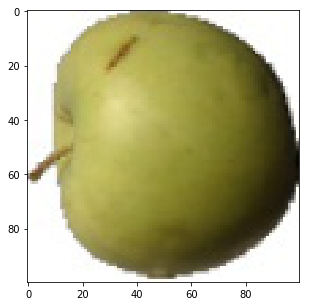

In [16]:
a = training_x[12000]
b = training_y[12000]
c = np.array(a, dtype=np.uint8)
print(c)
plt.imshow(c)
print(train_categories[np.argmax(b)])

In [17]:
# Normalize the input data
for i in range(len(training_x)):
    training_x[i] = training_x[i]/255
    print("Training Set Standardization Status: {}/{}".format(i+1, len(training_x)))

Training Set Standardization Status: 1/41322
Training Set Standardization Status: 2/41322
Training Set Standardization Status: 3/41322
Training Set Standardization Status: 4/41322
Training Set Standardization Status: 5/41322
Training Set Standardization Status: 6/41322
Training Set Standardization Status: 7/41322
Training Set Standardization Status: 8/41322
Training Set Standardization Status: 9/41322
Training Set Standardization Status: 10/41322
Training Set Standardization Status: 11/41322
Training Set Standardization Status: 12/41322
Training Set Standardization Status: 13/41322
Training Set Standardization Status: 14/41322
Training Set Standardization Status: 15/41322
Training Set Standardization Status: 16/41322
Training Set Standardization Status: 17/41322
Training Set Standardization Status: 18/41322
Training Set Standardization Status: 19/41322
Training Set Standardization Status: 20/41322
Training Set Standardization Status: 21/41322
Training Set Standardization Status: 22/413

Training Set Standardization Status: 736/41322
Training Set Standardization Status: 737/41322
Training Set Standardization Status: 738/41322
Training Set Standardization Status: 739/41322
Training Set Standardization Status: 740/41322
Training Set Standardization Status: 741/41322
Training Set Standardization Status: 742/41322
Training Set Standardization Status: 743/41322
Training Set Standardization Status: 744/41322
Training Set Standardization Status: 745/41322
Training Set Standardization Status: 746/41322
Training Set Standardization Status: 747/41322
Training Set Standardization Status: 748/41322
Training Set Standardization Status: 749/41322
Training Set Standardization Status: 750/41322
Training Set Standardization Status: 751/41322
Training Set Standardization Status: 752/41322
Training Set Standardization Status: 753/41322
Training Set Standardization Status: 754/41322
Training Set Standardization Status: 755/41322
Training Set Standardization Status: 756/41322
Training Set 

Training Set Standardization Status: 1471/41322
Training Set Standardization Status: 1472/41322
Training Set Standardization Status: 1473/41322
Training Set Standardization Status: 1474/41322
Training Set Standardization Status: 1475/41322
Training Set Standardization Status: 1476/41322
Training Set Standardization Status: 1477/41322
Training Set Standardization Status: 1478/41322
Training Set Standardization Status: 1479/41322
Training Set Standardization Status: 1480/41322
Training Set Standardization Status: 1481/41322
Training Set Standardization Status: 1482/41322
Training Set Standardization Status: 1483/41322
Training Set Standardization Status: 1484/41322
Training Set Standardization Status: 1485/41322
Training Set Standardization Status: 1486/41322
Training Set Standardization Status: 1487/41322
Training Set Standardization Status: 1488/41322
Training Set Standardization Status: 1489/41322
Training Set Standardization Status: 1490/41322
Training Set Standardization Status: 149

Training Set Standardization Status: 2247/41322
Training Set Standardization Status: 2248/41322
Training Set Standardization Status: 2249/41322
Training Set Standardization Status: 2250/41322
Training Set Standardization Status: 2251/41322
Training Set Standardization Status: 2252/41322
Training Set Standardization Status: 2253/41322
Training Set Standardization Status: 2254/41322
Training Set Standardization Status: 2255/41322
Training Set Standardization Status: 2256/41322
Training Set Standardization Status: 2257/41322
Training Set Standardization Status: 2258/41322
Training Set Standardization Status: 2259/41322
Training Set Standardization Status: 2260/41322
Training Set Standardization Status: 2261/41322
Training Set Standardization Status: 2262/41322
Training Set Standardization Status: 2263/41322
Training Set Standardization Status: 2264/41322
Training Set Standardization Status: 2265/41322
Training Set Standardization Status: 2266/41322
Training Set Standardization Status: 226

Training Set Standardization Status: 3018/41322
Training Set Standardization Status: 3019/41322
Training Set Standardization Status: 3020/41322
Training Set Standardization Status: 3021/41322
Training Set Standardization Status: 3022/41322
Training Set Standardization Status: 3023/41322
Training Set Standardization Status: 3024/41322
Training Set Standardization Status: 3025/41322
Training Set Standardization Status: 3026/41322
Training Set Standardization Status: 3027/41322
Training Set Standardization Status: 3028/41322
Training Set Standardization Status: 3029/41322
Training Set Standardization Status: 3030/41322
Training Set Standardization Status: 3031/41322
Training Set Standardization Status: 3032/41322
Training Set Standardization Status: 3033/41322
Training Set Standardization Status: 3034/41322
Training Set Standardization Status: 3035/41322
Training Set Standardization Status: 3036/41322
Training Set Standardization Status: 3037/41322
Training Set Standardization Status: 303

Training Set Standardization Status: 3715/41322
Training Set Standardization Status: 3716/41322
Training Set Standardization Status: 3717/41322
Training Set Standardization Status: 3718/41322
Training Set Standardization Status: 3719/41322
Training Set Standardization Status: 3720/41322
Training Set Standardization Status: 3721/41322
Training Set Standardization Status: 3722/41322
Training Set Standardization Status: 3723/41322
Training Set Standardization Status: 3724/41322
Training Set Standardization Status: 3725/41322
Training Set Standardization Status: 3726/41322
Training Set Standardization Status: 3727/41322
Training Set Standardization Status: 3728/41322
Training Set Standardization Status: 3729/41322
Training Set Standardization Status: 3730/41322
Training Set Standardization Status: 3731/41322
Training Set Standardization Status: 3732/41322
Training Set Standardization Status: 3733/41322
Training Set Standardization Status: 3734/41322
Training Set Standardization Status: 373

Training Set Standardization Status: 4476/41322
Training Set Standardization Status: 4477/41322
Training Set Standardization Status: 4478/41322
Training Set Standardization Status: 4479/41322
Training Set Standardization Status: 4480/41322
Training Set Standardization Status: 4481/41322
Training Set Standardization Status: 4482/41322
Training Set Standardization Status: 4483/41322
Training Set Standardization Status: 4484/41322
Training Set Standardization Status: 4485/41322
Training Set Standardization Status: 4486/41322
Training Set Standardization Status: 4487/41322
Training Set Standardization Status: 4488/41322
Training Set Standardization Status: 4489/41322
Training Set Standardization Status: 4490/41322
Training Set Standardization Status: 4491/41322
Training Set Standardization Status: 4492/41322
Training Set Standardization Status: 4493/41322
Training Set Standardization Status: 4494/41322
Training Set Standardization Status: 4495/41322
Training Set Standardization Status: 449

Training Set Standardization Status: 5228/41322
Training Set Standardization Status: 5229/41322
Training Set Standardization Status: 5230/41322
Training Set Standardization Status: 5231/41322
Training Set Standardization Status: 5232/41322
Training Set Standardization Status: 5233/41322
Training Set Standardization Status: 5234/41322
Training Set Standardization Status: 5235/41322
Training Set Standardization Status: 5236/41322
Training Set Standardization Status: 5237/41322
Training Set Standardization Status: 5238/41322
Training Set Standardization Status: 5239/41322
Training Set Standardization Status: 5240/41322
Training Set Standardization Status: 5241/41322
Training Set Standardization Status: 5242/41322
Training Set Standardization Status: 5243/41322
Training Set Standardization Status: 5244/41322
Training Set Standardization Status: 5245/41322
Training Set Standardization Status: 5246/41322
Training Set Standardization Status: 5247/41322
Training Set Standardization Status: 524

Training Set Standardization Status: 6006/41322
Training Set Standardization Status: 6007/41322
Training Set Standardization Status: 6008/41322
Training Set Standardization Status: 6009/41322
Training Set Standardization Status: 6010/41322
Training Set Standardization Status: 6011/41322
Training Set Standardization Status: 6012/41322
Training Set Standardization Status: 6013/41322
Training Set Standardization Status: 6014/41322
Training Set Standardization Status: 6015/41322
Training Set Standardization Status: 6016/41322
Training Set Standardization Status: 6017/41322
Training Set Standardization Status: 6018/41322
Training Set Standardization Status: 6019/41322
Training Set Standardization Status: 6020/41322
Training Set Standardization Status: 6021/41322
Training Set Standardization Status: 6022/41322
Training Set Standardization Status: 6023/41322
Training Set Standardization Status: 6024/41322
Training Set Standardization Status: 6025/41322
Training Set Standardization Status: 602

Training Set Standardization Status: 6758/41322
Training Set Standardization Status: 6759/41322
Training Set Standardization Status: 6760/41322
Training Set Standardization Status: 6761/41322
Training Set Standardization Status: 6762/41322
Training Set Standardization Status: 6763/41322
Training Set Standardization Status: 6764/41322
Training Set Standardization Status: 6765/41322
Training Set Standardization Status: 6766/41322
Training Set Standardization Status: 6767/41322
Training Set Standardization Status: 6768/41322
Training Set Standardization Status: 6769/41322
Training Set Standardization Status: 6770/41322
Training Set Standardization Status: 6771/41322
Training Set Standardization Status: 6772/41322
Training Set Standardization Status: 6773/41322
Training Set Standardization Status: 6774/41322
Training Set Standardization Status: 6775/41322
Training Set Standardization Status: 6776/41322
Training Set Standardization Status: 6777/41322
Training Set Standardization Status: 677

Training Set Standardization Status: 7464/41322
Training Set Standardization Status: 7465/41322
Training Set Standardization Status: 7466/41322
Training Set Standardization Status: 7467/41322
Training Set Standardization Status: 7468/41322
Training Set Standardization Status: 7469/41322
Training Set Standardization Status: 7470/41322
Training Set Standardization Status: 7471/41322
Training Set Standardization Status: 7472/41322
Training Set Standardization Status: 7473/41322
Training Set Standardization Status: 7474/41322
Training Set Standardization Status: 7475/41322
Training Set Standardization Status: 7476/41322
Training Set Standardization Status: 7477/41322
Training Set Standardization Status: 7478/41322
Training Set Standardization Status: 7479/41322
Training Set Standardization Status: 7480/41322
Training Set Standardization Status: 7481/41322
Training Set Standardization Status: 7482/41322
Training Set Standardization Status: 7483/41322
Training Set Standardization Status: 748

Training Set Standardization Status: 8227/41322
Training Set Standardization Status: 8228/41322
Training Set Standardization Status: 8229/41322
Training Set Standardization Status: 8230/41322
Training Set Standardization Status: 8231/41322
Training Set Standardization Status: 8232/41322
Training Set Standardization Status: 8233/41322
Training Set Standardization Status: 8234/41322
Training Set Standardization Status: 8235/41322
Training Set Standardization Status: 8236/41322
Training Set Standardization Status: 8237/41322
Training Set Standardization Status: 8238/41322
Training Set Standardization Status: 8239/41322
Training Set Standardization Status: 8240/41322
Training Set Standardization Status: 8241/41322
Training Set Standardization Status: 8242/41322
Training Set Standardization Status: 8243/41322
Training Set Standardization Status: 8244/41322
Training Set Standardization Status: 8245/41322
Training Set Standardization Status: 8246/41322
Training Set Standardization Status: 824

Training Set Standardization Status: 8956/41322
Training Set Standardization Status: 8957/41322
Training Set Standardization Status: 8958/41322
Training Set Standardization Status: 8959/41322
Training Set Standardization Status: 8960/41322
Training Set Standardization Status: 8961/41322
Training Set Standardization Status: 8962/41322
Training Set Standardization Status: 8963/41322
Training Set Standardization Status: 8964/41322
Training Set Standardization Status: 8965/41322
Training Set Standardization Status: 8966/41322
Training Set Standardization Status: 8967/41322
Training Set Standardization Status: 8968/41322
Training Set Standardization Status: 8969/41322
Training Set Standardization Status: 8970/41322
Training Set Standardization Status: 8971/41322
Training Set Standardization Status: 8972/41322
Training Set Standardization Status: 8973/41322
Training Set Standardization Status: 8974/41322
Training Set Standardization Status: 8975/41322
Training Set Standardization Status: 897

Training Set Standardization Status: 9725/41322
Training Set Standardization Status: 9726/41322
Training Set Standardization Status: 9727/41322
Training Set Standardization Status: 9728/41322
Training Set Standardization Status: 9729/41322
Training Set Standardization Status: 9730/41322
Training Set Standardization Status: 9731/41322
Training Set Standardization Status: 9732/41322
Training Set Standardization Status: 9733/41322
Training Set Standardization Status: 9734/41322
Training Set Standardization Status: 9735/41322
Training Set Standardization Status: 9736/41322
Training Set Standardization Status: 9737/41322
Training Set Standardization Status: 9738/41322
Training Set Standardization Status: 9739/41322
Training Set Standardization Status: 9740/41322
Training Set Standardization Status: 9741/41322
Training Set Standardization Status: 9742/41322
Training Set Standardization Status: 9743/41322
Training Set Standardization Status: 9744/41322
Training Set Standardization Status: 974

Training Set Standardization Status: 10486/41322
Training Set Standardization Status: 10487/41322
Training Set Standardization Status: 10488/41322
Training Set Standardization Status: 10489/41322
Training Set Standardization Status: 10490/41322
Training Set Standardization Status: 10491/41322
Training Set Standardization Status: 10492/41322
Training Set Standardization Status: 10493/41322
Training Set Standardization Status: 10494/41322
Training Set Standardization Status: 10495/41322
Training Set Standardization Status: 10496/41322
Training Set Standardization Status: 10497/41322
Training Set Standardization Status: 10498/41322
Training Set Standardization Status: 10499/41322
Training Set Standardization Status: 10500/41322
Training Set Standardization Status: 10501/41322
Training Set Standardization Status: 10502/41322
Training Set Standardization Status: 10503/41322
Training Set Standardization Status: 10504/41322
Training Set Standardization Status: 10505/41322
Training Set Standar

Training Set Standardization Status: 11182/41322
Training Set Standardization Status: 11183/41322
Training Set Standardization Status: 11184/41322
Training Set Standardization Status: 11185/41322
Training Set Standardization Status: 11186/41322
Training Set Standardization Status: 11187/41322
Training Set Standardization Status: 11188/41322
Training Set Standardization Status: 11189/41322
Training Set Standardization Status: 11190/41322
Training Set Standardization Status: 11191/41322
Training Set Standardization Status: 11192/41322
Training Set Standardization Status: 11193/41322
Training Set Standardization Status: 11194/41322
Training Set Standardization Status: 11195/41322
Training Set Standardization Status: 11196/41322
Training Set Standardization Status: 11197/41322
Training Set Standardization Status: 11198/41322
Training Set Standardization Status: 11199/41322
Training Set Standardization Status: 11200/41322
Training Set Standardization Status: 11201/41322
Training Set Standar

Training Set Standardization Status: 11920/41322
Training Set Standardization Status: 11921/41322
Training Set Standardization Status: 11922/41322
Training Set Standardization Status: 11923/41322
Training Set Standardization Status: 11924/41322
Training Set Standardization Status: 11925/41322
Training Set Standardization Status: 11926/41322
Training Set Standardization Status: 11927/41322
Training Set Standardization Status: 11928/41322
Training Set Standardization Status: 11929/41322
Training Set Standardization Status: 11930/41322
Training Set Standardization Status: 11931/41322
Training Set Standardization Status: 11932/41322
Training Set Standardization Status: 11933/41322
Training Set Standardization Status: 11934/41322
Training Set Standardization Status: 11935/41322
Training Set Standardization Status: 11936/41322
Training Set Standardization Status: 11937/41322
Training Set Standardization Status: 11938/41322
Training Set Standardization Status: 11939/41322
Training Set Standar

Training Set Standardization Status: 12690/41322
Training Set Standardization Status: 12691/41322
Training Set Standardization Status: 12692/41322
Training Set Standardization Status: 12693/41322
Training Set Standardization Status: 12694/41322
Training Set Standardization Status: 12695/41322
Training Set Standardization Status: 12696/41322
Training Set Standardization Status: 12697/41322
Training Set Standardization Status: 12698/41322
Training Set Standardization Status: 12699/41322
Training Set Standardization Status: 12700/41322
Training Set Standardization Status: 12701/41322
Training Set Standardization Status: 12702/41322
Training Set Standardization Status: 12703/41322
Training Set Standardization Status: 12704/41322
Training Set Standardization Status: 12705/41322
Training Set Standardization Status: 12706/41322
Training Set Standardization Status: 12707/41322
Training Set Standardization Status: 12708/41322
Training Set Standardization Status: 12709/41322
Training Set Standar

Training Set Standardization Status: 13476/41322
Training Set Standardization Status: 13477/41322
Training Set Standardization Status: 13478/41322
Training Set Standardization Status: 13479/41322
Training Set Standardization Status: 13480/41322
Training Set Standardization Status: 13481/41322
Training Set Standardization Status: 13482/41322
Training Set Standardization Status: 13483/41322
Training Set Standardization Status: 13484/41322
Training Set Standardization Status: 13485/41322
Training Set Standardization Status: 13486/41322
Training Set Standardization Status: 13487/41322
Training Set Standardization Status: 13488/41322
Training Set Standardization Status: 13489/41322
Training Set Standardization Status: 13490/41322
Training Set Standardization Status: 13491/41322
Training Set Standardization Status: 13492/41322
Training Set Standardization Status: 13493/41322
Training Set Standardization Status: 13494/41322
Training Set Standardization Status: 13495/41322
Training Set Standar

Training Set Standardization Status: 14218/41322
Training Set Standardization Status: 14219/41322
Training Set Standardization Status: 14220/41322
Training Set Standardization Status: 14221/41322
Training Set Standardization Status: 14222/41322
Training Set Standardization Status: 14223/41322
Training Set Standardization Status: 14224/41322
Training Set Standardization Status: 14225/41322
Training Set Standardization Status: 14226/41322
Training Set Standardization Status: 14227/41322
Training Set Standardization Status: 14228/41322
Training Set Standardization Status: 14229/41322
Training Set Standardization Status: 14230/41322
Training Set Standardization Status: 14231/41322
Training Set Standardization Status: 14232/41322
Training Set Standardization Status: 14233/41322
Training Set Standardization Status: 14234/41322
Training Set Standardization Status: 14235/41322
Training Set Standardization Status: 14236/41322
Training Set Standardization Status: 14237/41322
Training Set Standar

Training Set Standardization Status: 14926/41322
Training Set Standardization Status: 14927/41322
Training Set Standardization Status: 14928/41322
Training Set Standardization Status: 14929/41322
Training Set Standardization Status: 14930/41322
Training Set Standardization Status: 14931/41322
Training Set Standardization Status: 14932/41322
Training Set Standardization Status: 14933/41322
Training Set Standardization Status: 14934/41322
Training Set Standardization Status: 14935/41322
Training Set Standardization Status: 14936/41322
Training Set Standardization Status: 14937/41322
Training Set Standardization Status: 14938/41322
Training Set Standardization Status: 14939/41322
Training Set Standardization Status: 14940/41322
Training Set Standardization Status: 14941/41322
Training Set Standardization Status: 14942/41322
Training Set Standardization Status: 14943/41322
Training Set Standardization Status: 14944/41322
Training Set Standardization Status: 14945/41322
Training Set Standar

Training Set Standardization Status: 15649/41322
Training Set Standardization Status: 15650/41322
Training Set Standardization Status: 15651/41322
Training Set Standardization Status: 15652/41322
Training Set Standardization Status: 15653/41322
Training Set Standardization Status: 15654/41322
Training Set Standardization Status: 15655/41322
Training Set Standardization Status: 15656/41322
Training Set Standardization Status: 15657/41322
Training Set Standardization Status: 15658/41322
Training Set Standardization Status: 15659/41322
Training Set Standardization Status: 15660/41322
Training Set Standardization Status: 15661/41322
Training Set Standardization Status: 15662/41322
Training Set Standardization Status: 15663/41322
Training Set Standardization Status: 15664/41322
Training Set Standardization Status: 15665/41322
Training Set Standardization Status: 15666/41322
Training Set Standardization Status: 15667/41322
Training Set Standardization Status: 15668/41322
Training Set Standar

Training Set Standardization Status: 16400/41322
Training Set Standardization Status: 16401/41322
Training Set Standardization Status: 16402/41322
Training Set Standardization Status: 16403/41322
Training Set Standardization Status: 16404/41322
Training Set Standardization Status: 16405/41322
Training Set Standardization Status: 16406/41322
Training Set Standardization Status: 16407/41322
Training Set Standardization Status: 16408/41322
Training Set Standardization Status: 16409/41322
Training Set Standardization Status: 16410/41322
Training Set Standardization Status: 16411/41322
Training Set Standardization Status: 16412/41322
Training Set Standardization Status: 16413/41322
Training Set Standardization Status: 16414/41322
Training Set Standardization Status: 16415/41322
Training Set Standardization Status: 16416/41322
Training Set Standardization Status: 16417/41322
Training Set Standardization Status: 16418/41322
Training Set Standardization Status: 16419/41322
Training Set Standar

Training Set Standardization Status: 17174/41322
Training Set Standardization Status: 17175/41322
Training Set Standardization Status: 17176/41322
Training Set Standardization Status: 17177/41322
Training Set Standardization Status: 17178/41322
Training Set Standardization Status: 17179/41322
Training Set Standardization Status: 17180/41322
Training Set Standardization Status: 17181/41322
Training Set Standardization Status: 17182/41322
Training Set Standardization Status: 17183/41322
Training Set Standardization Status: 17184/41322
Training Set Standardization Status: 17185/41322
Training Set Standardization Status: 17186/41322
Training Set Standardization Status: 17187/41322
Training Set Standardization Status: 17188/41322
Training Set Standardization Status: 17189/41322
Training Set Standardization Status: 17190/41322
Training Set Standardization Status: 17191/41322
Training Set Standardization Status: 17192/41322
Training Set Standardization Status: 17193/41322
Training Set Standar

Training Set Standardization Status: 17939/41322
Training Set Standardization Status: 17940/41322
Training Set Standardization Status: 17941/41322
Training Set Standardization Status: 17942/41322
Training Set Standardization Status: 17943/41322
Training Set Standardization Status: 17944/41322
Training Set Standardization Status: 17945/41322
Training Set Standardization Status: 17946/41322
Training Set Standardization Status: 17947/41322
Training Set Standardization Status: 17948/41322
Training Set Standardization Status: 17949/41322
Training Set Standardization Status: 17950/41322
Training Set Standardization Status: 17951/41322
Training Set Standardization Status: 17952/41322
Training Set Standardization Status: 17953/41322
Training Set Standardization Status: 17954/41322
Training Set Standardization Status: 17955/41322
Training Set Standardization Status: 17956/41322
Training Set Standardization Status: 17957/41322
Training Set Standardization Status: 17958/41322
Training Set Standar

Training Set Standardization Status: 18534/41322
Training Set Standardization Status: 18535/41322
Training Set Standardization Status: 18536/41322
Training Set Standardization Status: 18537/41322
Training Set Standardization Status: 18538/41322
Training Set Standardization Status: 18539/41322
Training Set Standardization Status: 18540/41322
Training Set Standardization Status: 18541/41322
Training Set Standardization Status: 18542/41322
Training Set Standardization Status: 18543/41322
Training Set Standardization Status: 18544/41322
Training Set Standardization Status: 18545/41322
Training Set Standardization Status: 18546/41322
Training Set Standardization Status: 18547/41322
Training Set Standardization Status: 18548/41322
Training Set Standardization Status: 18549/41322
Training Set Standardization Status: 18550/41322
Training Set Standardization Status: 18551/41322
Training Set Standardization Status: 18552/41322
Training Set Standardization Status: 18553/41322
Training Set Standar

Training Set Standardization Status: 19026/41322
Training Set Standardization Status: 19027/41322
Training Set Standardization Status: 19028/41322
Training Set Standardization Status: 19029/41322
Training Set Standardization Status: 19030/41322
Training Set Standardization Status: 19031/41322
Training Set Standardization Status: 19032/41322
Training Set Standardization Status: 19033/41322
Training Set Standardization Status: 19034/41322
Training Set Standardization Status: 19035/41322
Training Set Standardization Status: 19036/41322
Training Set Standardization Status: 19037/41322
Training Set Standardization Status: 19038/41322
Training Set Standardization Status: 19039/41322
Training Set Standardization Status: 19040/41322
Training Set Standardization Status: 19041/41322
Training Set Standardization Status: 19042/41322
Training Set Standardization Status: 19043/41322
Training Set Standardization Status: 19044/41322
Training Set Standardization Status: 19045/41322
Training Set Standar

Training Set Standardization Status: 19246/41322
Training Set Standardization Status: 19247/41322
Training Set Standardization Status: 19248/41322
Training Set Standardization Status: 19249/41322
Training Set Standardization Status: 19250/41322
Training Set Standardization Status: 19251/41322
Training Set Standardization Status: 19252/41322
Training Set Standardization Status: 19253/41322
Training Set Standardization Status: 19254/41322
Training Set Standardization Status: 19255/41322
Training Set Standardization Status: 19256/41322
Training Set Standardization Status: 19257/41322
Training Set Standardization Status: 19258/41322
Training Set Standardization Status: 19259/41322
Training Set Standardization Status: 19260/41322
Training Set Standardization Status: 19261/41322
Training Set Standardization Status: 19262/41322
Training Set Standardization Status: 19263/41322
Training Set Standardization Status: 19264/41322
Training Set Standardization Status: 19265/41322
Training Set Standar

Training Set Standardization Status: 19444/41322
Training Set Standardization Status: 19445/41322
Training Set Standardization Status: 19446/41322
Training Set Standardization Status: 19447/41322
Training Set Standardization Status: 19448/41322
Training Set Standardization Status: 19449/41322
Training Set Standardization Status: 19450/41322
Training Set Standardization Status: 19451/41322
Training Set Standardization Status: 19452/41322
Training Set Standardization Status: 19453/41322
Training Set Standardization Status: 19454/41322
Training Set Standardization Status: 19455/41322
Training Set Standardization Status: 19456/41322
Training Set Standardization Status: 19457/41322
Training Set Standardization Status: 19458/41322
Training Set Standardization Status: 19459/41322
Training Set Standardization Status: 19460/41322
Training Set Standardization Status: 19461/41322
Training Set Standardization Status: 19462/41322
Training Set Standardization Status: 19463/41322
Training Set Standar

Training Set Standardization Status: 19634/41322
Training Set Standardization Status: 19635/41322
Training Set Standardization Status: 19636/41322
Training Set Standardization Status: 19637/41322
Training Set Standardization Status: 19638/41322
Training Set Standardization Status: 19639/41322
Training Set Standardization Status: 19640/41322
Training Set Standardization Status: 19641/41322
Training Set Standardization Status: 19642/41322
Training Set Standardization Status: 19643/41322
Training Set Standardization Status: 19644/41322
Training Set Standardization Status: 19645/41322
Training Set Standardization Status: 19646/41322
Training Set Standardization Status: 19647/41322
Training Set Standardization Status: 19648/41322
Training Set Standardization Status: 19649/41322
Training Set Standardization Status: 19650/41322
Training Set Standardization Status: 19651/41322
Training Set Standardization Status: 19652/41322
Training Set Standardization Status: 19653/41322
Training Set Standar

Training Set Standardization Status: 20009/41322
Training Set Standardization Status: 20010/41322
Training Set Standardization Status: 20011/41322
Training Set Standardization Status: 20012/41322
Training Set Standardization Status: 20013/41322
Training Set Standardization Status: 20014/41322
Training Set Standardization Status: 20015/41322
Training Set Standardization Status: 20016/41322
Training Set Standardization Status: 20017/41322
Training Set Standardization Status: 20018/41322
Training Set Standardization Status: 20019/41322
Training Set Standardization Status: 20020/41322
Training Set Standardization Status: 20021/41322
Training Set Standardization Status: 20022/41322
Training Set Standardization Status: 20023/41322
Training Set Standardization Status: 20024/41322
Training Set Standardization Status: 20025/41322
Training Set Standardization Status: 20026/41322
Training Set Standardization Status: 20027/41322
Training Set Standardization Status: 20028/41322
Training Set Standar

Training Set Standardization Status: 20469/41322
Training Set Standardization Status: 20470/41322
Training Set Standardization Status: 20471/41322
Training Set Standardization Status: 20472/41322
Training Set Standardization Status: 20473/41322
Training Set Standardization Status: 20474/41322
Training Set Standardization Status: 20475/41322
Training Set Standardization Status: 20476/41322
Training Set Standardization Status: 20477/41322
Training Set Standardization Status: 20478/41322
Training Set Standardization Status: 20479/41322
Training Set Standardization Status: 20480/41322
Training Set Standardization Status: 20481/41322
Training Set Standardization Status: 20482/41322
Training Set Standardization Status: 20483/41322
Training Set Standardization Status: 20484/41322
Training Set Standardization Status: 20485/41322
Training Set Standardization Status: 20486/41322
Training Set Standardization Status: 20487/41322
Training Set Standardization Status: 20488/41322
Training Set Standar

Training Set Standardization Status: 21178/41322
Training Set Standardization Status: 21179/41322
Training Set Standardization Status: 21180/41322
Training Set Standardization Status: 21181/41322
Training Set Standardization Status: 21182/41322
Training Set Standardization Status: 21183/41322
Training Set Standardization Status: 21184/41322
Training Set Standardization Status: 21185/41322
Training Set Standardization Status: 21186/41322
Training Set Standardization Status: 21187/41322
Training Set Standardization Status: 21188/41322
Training Set Standardization Status: 21189/41322
Training Set Standardization Status: 21190/41322
Training Set Standardization Status: 21191/41322
Training Set Standardization Status: 21192/41322
Training Set Standardization Status: 21193/41322
Training Set Standardization Status: 21194/41322
Training Set Standardization Status: 21195/41322
Training Set Standardization Status: 21196/41322
Training Set Standardization Status: 21197/41322
Training Set Standar

Training Set Standardization Status: 21948/41322
Training Set Standardization Status: 21949/41322
Training Set Standardization Status: 21950/41322
Training Set Standardization Status: 21951/41322
Training Set Standardization Status: 21952/41322
Training Set Standardization Status: 21953/41322
Training Set Standardization Status: 21954/41322
Training Set Standardization Status: 21955/41322
Training Set Standardization Status: 21956/41322
Training Set Standardization Status: 21957/41322
Training Set Standardization Status: 21958/41322
Training Set Standardization Status: 21959/41322
Training Set Standardization Status: 21960/41322
Training Set Standardization Status: 21961/41322
Training Set Standardization Status: 21962/41322
Training Set Standardization Status: 21963/41322
Training Set Standardization Status: 21964/41322
Training Set Standardization Status: 21965/41322
Training Set Standardization Status: 21966/41322
Training Set Standardization Status: 21967/41322
Training Set Standar

Training Set Standardization Status: 22705/41322
Training Set Standardization Status: 22706/41322
Training Set Standardization Status: 22707/41322
Training Set Standardization Status: 22708/41322
Training Set Standardization Status: 22709/41322
Training Set Standardization Status: 22710/41322
Training Set Standardization Status: 22711/41322
Training Set Standardization Status: 22712/41322
Training Set Standardization Status: 22713/41322
Training Set Standardization Status: 22714/41322
Training Set Standardization Status: 22715/41322
Training Set Standardization Status: 22716/41322
Training Set Standardization Status: 22717/41322
Training Set Standardization Status: 22718/41322
Training Set Standardization Status: 22719/41322
Training Set Standardization Status: 22720/41322
Training Set Standardization Status: 22721/41322
Training Set Standardization Status: 22722/41322
Training Set Standardization Status: 22723/41322
Training Set Standardization Status: 22724/41322
Training Set Standar

Training Set Standardization Status: 23482/41322
Training Set Standardization Status: 23483/41322
Training Set Standardization Status: 23484/41322
Training Set Standardization Status: 23485/41322
Training Set Standardization Status: 23486/41322
Training Set Standardization Status: 23487/41322
Training Set Standardization Status: 23488/41322
Training Set Standardization Status: 23489/41322
Training Set Standardization Status: 23490/41322
Training Set Standardization Status: 23491/41322
Training Set Standardization Status: 23492/41322
Training Set Standardization Status: 23493/41322
Training Set Standardization Status: 23494/41322
Training Set Standardization Status: 23495/41322
Training Set Standardization Status: 23496/41322
Training Set Standardization Status: 23497/41322
Training Set Standardization Status: 23498/41322
Training Set Standardization Status: 23499/41322
Training Set Standardization Status: 23500/41322
Training Set Standardization Status: 23501/41322
Training Set Standar

Training Set Standardization Status: 24224/41322
Training Set Standardization Status: 24225/41322
Training Set Standardization Status: 24226/41322
Training Set Standardization Status: 24227/41322
Training Set Standardization Status: 24228/41322
Training Set Standardization Status: 24229/41322
Training Set Standardization Status: 24230/41322
Training Set Standardization Status: 24231/41322
Training Set Standardization Status: 24232/41322
Training Set Standardization Status: 24233/41322
Training Set Standardization Status: 24234/41322
Training Set Standardization Status: 24235/41322
Training Set Standardization Status: 24236/41322
Training Set Standardization Status: 24237/41322
Training Set Standardization Status: 24238/41322
Training Set Standardization Status: 24239/41322
Training Set Standardization Status: 24240/41322
Training Set Standardization Status: 24241/41322
Training Set Standardization Status: 24242/41322
Training Set Standardization Status: 24243/41322
Training Set Standar

Training Set Standardization Status: 24525/41322
Training Set Standardization Status: 24526/41322
Training Set Standardization Status: 24527/41322
Training Set Standardization Status: 24528/41322
Training Set Standardization Status: 24529/41322
Training Set Standardization Status: 24530/41322
Training Set Standardization Status: 24531/41322
Training Set Standardization Status: 24532/41322
Training Set Standardization Status: 24533/41322
Training Set Standardization Status: 24534/41322
Training Set Standardization Status: 24535/41322
Training Set Standardization Status: 24536/41322
Training Set Standardization Status: 24537/41322
Training Set Standardization Status: 24538/41322
Training Set Standardization Status: 24539/41322
Training Set Standardization Status: 24540/41322
Training Set Standardization Status: 24541/41322
Training Set Standardization Status: 24542/41322
Training Set Standardization Status: 24543/41322
Training Set Standardization Status: 24544/41322
Training Set Standar

Training Set Standardization Status: 24750/41322
Training Set Standardization Status: 24751/41322
Training Set Standardization Status: 24752/41322
Training Set Standardization Status: 24753/41322
Training Set Standardization Status: 24754/41322
Training Set Standardization Status: 24755/41322
Training Set Standardization Status: 24756/41322
Training Set Standardization Status: 24757/41322
Training Set Standardization Status: 24758/41322
Training Set Standardization Status: 24759/41322
Training Set Standardization Status: 24760/41322
Training Set Standardization Status: 24761/41322
Training Set Standardization Status: 24762/41322
Training Set Standardization Status: 24763/41322
Training Set Standardization Status: 24764/41322
Training Set Standardization Status: 24765/41322
Training Set Standardization Status: 24766/41322
Training Set Standardization Status: 24767/41322
Training Set Standardization Status: 24768/41322
Training Set Standardization Status: 24769/41322
Training Set Standar

Training Set Standardization Status: 25019/41322
Training Set Standardization Status: 25020/41322
Training Set Standardization Status: 25021/41322
Training Set Standardization Status: 25022/41322
Training Set Standardization Status: 25023/41322
Training Set Standardization Status: 25024/41322
Training Set Standardization Status: 25025/41322
Training Set Standardization Status: 25026/41322
Training Set Standardization Status: 25027/41322
Training Set Standardization Status: 25028/41322
Training Set Standardization Status: 25029/41322
Training Set Standardization Status: 25030/41322
Training Set Standardization Status: 25031/41322
Training Set Standardization Status: 25032/41322
Training Set Standardization Status: 25033/41322
Training Set Standardization Status: 25034/41322
Training Set Standardization Status: 25035/41322
Training Set Standardization Status: 25036/41322
Training Set Standardization Status: 25037/41322
Training Set Standardization Status: 25038/41322
Training Set Standar

Training Set Standardization Status: 25301/41322
Training Set Standardization Status: 25302/41322
Training Set Standardization Status: 25303/41322
Training Set Standardization Status: 25304/41322
Training Set Standardization Status: 25305/41322
Training Set Standardization Status: 25306/41322
Training Set Standardization Status: 25307/41322
Training Set Standardization Status: 25308/41322
Training Set Standardization Status: 25309/41322
Training Set Standardization Status: 25310/41322
Training Set Standardization Status: 25311/41322
Training Set Standardization Status: 25312/41322
Training Set Standardization Status: 25313/41322
Training Set Standardization Status: 25314/41322
Training Set Standardization Status: 25315/41322
Training Set Standardization Status: 25316/41322
Training Set Standardization Status: 25317/41322
Training Set Standardization Status: 25318/41322
Training Set Standardization Status: 25319/41322
Training Set Standardization Status: 25320/41322
Training Set Standar

Training Set Standardization Status: 25580/41322
Training Set Standardization Status: 25581/41322
Training Set Standardization Status: 25582/41322
Training Set Standardization Status: 25583/41322
Training Set Standardization Status: 25584/41322
Training Set Standardization Status: 25585/41322
Training Set Standardization Status: 25586/41322
Training Set Standardization Status: 25587/41322
Training Set Standardization Status: 25588/41322
Training Set Standardization Status: 25589/41322
Training Set Standardization Status: 25590/41322
Training Set Standardization Status: 25591/41322
Training Set Standardization Status: 25592/41322
Training Set Standardization Status: 25593/41322
Training Set Standardization Status: 25594/41322
Training Set Standardization Status: 25595/41322
Training Set Standardization Status: 25596/41322
Training Set Standardization Status: 25597/41322
Training Set Standardization Status: 25598/41322
Training Set Standardization Status: 25599/41322
Training Set Standar

Training Set Standardization Status: 25941/41322
Training Set Standardization Status: 25942/41322
Training Set Standardization Status: 25943/41322
Training Set Standardization Status: 25944/41322
Training Set Standardization Status: 25945/41322
Training Set Standardization Status: 25946/41322
Training Set Standardization Status: 25947/41322
Training Set Standardization Status: 25948/41322
Training Set Standardization Status: 25949/41322
Training Set Standardization Status: 25950/41322
Training Set Standardization Status: 25951/41322
Training Set Standardization Status: 25952/41322
Training Set Standardization Status: 25953/41322
Training Set Standardization Status: 25954/41322
Training Set Standardization Status: 25955/41322
Training Set Standardization Status: 25956/41322
Training Set Standardization Status: 25957/41322
Training Set Standardization Status: 25958/41322
Training Set Standardization Status: 25959/41322
Training Set Standardization Status: 25960/41322
Training Set Standar

Training Set Standardization Status: 26272/41322
Training Set Standardization Status: 26273/41322
Training Set Standardization Status: 26274/41322
Training Set Standardization Status: 26275/41322
Training Set Standardization Status: 26276/41322
Training Set Standardization Status: 26277/41322
Training Set Standardization Status: 26278/41322
Training Set Standardization Status: 26279/41322
Training Set Standardization Status: 26280/41322
Training Set Standardization Status: 26281/41322
Training Set Standardization Status: 26282/41322
Training Set Standardization Status: 26283/41322
Training Set Standardization Status: 26284/41322
Training Set Standardization Status: 26285/41322
Training Set Standardization Status: 26286/41322
Training Set Standardization Status: 26287/41322
Training Set Standardization Status: 26288/41322
Training Set Standardization Status: 26289/41322
Training Set Standardization Status: 26290/41322
Training Set Standardization Status: 26291/41322
Training Set Standar

Training Set Standardization Status: 26465/41322
Training Set Standardization Status: 26466/41322
Training Set Standardization Status: 26467/41322
Training Set Standardization Status: 26468/41322
Training Set Standardization Status: 26469/41322
Training Set Standardization Status: 26470/41322
Training Set Standardization Status: 26471/41322
Training Set Standardization Status: 26472/41322
Training Set Standardization Status: 26473/41322
Training Set Standardization Status: 26474/41322
Training Set Standardization Status: 26475/41322
Training Set Standardization Status: 26476/41322
Training Set Standardization Status: 26477/41322
Training Set Standardization Status: 26478/41322
Training Set Standardization Status: 26479/41322
Training Set Standardization Status: 26480/41322
Training Set Standardization Status: 26481/41322
Training Set Standardization Status: 26482/41322
Training Set Standardization Status: 26483/41322
Training Set Standardization Status: 26484/41322
Training Set Standar

Training Set Standardization Status: 26651/41322
Training Set Standardization Status: 26652/41322
Training Set Standardization Status: 26653/41322
Training Set Standardization Status: 26654/41322
Training Set Standardization Status: 26655/41322
Training Set Standardization Status: 26656/41322
Training Set Standardization Status: 26657/41322
Training Set Standardization Status: 26658/41322
Training Set Standardization Status: 26659/41322
Training Set Standardization Status: 26660/41322
Training Set Standardization Status: 26661/41322
Training Set Standardization Status: 26662/41322
Training Set Standardization Status: 26663/41322
Training Set Standardization Status: 26664/41322
Training Set Standardization Status: 26665/41322
Training Set Standardization Status: 26666/41322
Training Set Standardization Status: 26667/41322
Training Set Standardization Status: 26668/41322
Training Set Standardization Status: 26669/41322
Training Set Standardization Status: 26670/41322
Training Set Standar

Training Set Standardization Status: 27375/41322
Training Set Standardization Status: 27376/41322
Training Set Standardization Status: 27377/41322
Training Set Standardization Status: 27378/41322
Training Set Standardization Status: 27379/41322
Training Set Standardization Status: 27380/41322
Training Set Standardization Status: 27381/41322
Training Set Standardization Status: 27382/41322
Training Set Standardization Status: 27383/41322
Training Set Standardization Status: 27384/41322
Training Set Standardization Status: 27385/41322
Training Set Standardization Status: 27386/41322
Training Set Standardization Status: 27387/41322
Training Set Standardization Status: 27388/41322
Training Set Standardization Status: 27389/41322
Training Set Standardization Status: 27390/41322
Training Set Standardization Status: 27391/41322
Training Set Standardization Status: 27392/41322
Training Set Standardization Status: 27393/41322
Training Set Standardization Status: 27394/41322
Training Set Standar

Training Set Standardization Status: 28123/41322
Training Set Standardization Status: 28124/41322
Training Set Standardization Status: 28125/41322
Training Set Standardization Status: 28126/41322
Training Set Standardization Status: 28127/41322
Training Set Standardization Status: 28128/41322
Training Set Standardization Status: 28129/41322
Training Set Standardization Status: 28130/41322
Training Set Standardization Status: 28131/41322
Training Set Standardization Status: 28132/41322
Training Set Standardization Status: 28133/41322
Training Set Standardization Status: 28134/41322
Training Set Standardization Status: 28135/41322
Training Set Standardization Status: 28136/41322
Training Set Standardization Status: 28137/41322
Training Set Standardization Status: 28138/41322
Training Set Standardization Status: 28139/41322
Training Set Standardization Status: 28140/41322
Training Set Standardization Status: 28141/41322
Training Set Standardization Status: 28142/41322
Training Set Standar

Training Set Standardization Status: 28888/41322
Training Set Standardization Status: 28889/41322
Training Set Standardization Status: 28890/41322
Training Set Standardization Status: 28891/41322
Training Set Standardization Status: 28892/41322
Training Set Standardization Status: 28893/41322
Training Set Standardization Status: 28894/41322
Training Set Standardization Status: 28895/41322
Training Set Standardization Status: 28896/41322
Training Set Standardization Status: 28897/41322
Training Set Standardization Status: 28898/41322
Training Set Standardization Status: 28899/41322
Training Set Standardization Status: 28900/41322
Training Set Standardization Status: 28901/41322
Training Set Standardization Status: 28902/41322
Training Set Standardization Status: 28903/41322
Training Set Standardization Status: 28904/41322
Training Set Standardization Status: 28905/41322
Training Set Standardization Status: 28906/41322
Training Set Standardization Status: 28907/41322
Training Set Standar

Training Set Standardization Status: 29660/41322
Training Set Standardization Status: 29661/41322
Training Set Standardization Status: 29662/41322
Training Set Standardization Status: 29663/41322
Training Set Standardization Status: 29664/41322
Training Set Standardization Status: 29665/41322
Training Set Standardization Status: 29666/41322
Training Set Standardization Status: 29667/41322
Training Set Standardization Status: 29668/41322
Training Set Standardization Status: 29669/41322
Training Set Standardization Status: 29670/41322
Training Set Standardization Status: 29671/41322
Training Set Standardization Status: 29672/41322
Training Set Standardization Status: 29673/41322
Training Set Standardization Status: 29674/41322
Training Set Standardization Status: 29675/41322
Training Set Standardization Status: 29676/41322
Training Set Standardization Status: 29677/41322
Training Set Standardization Status: 29678/41322
Training Set Standardization Status: 29679/41322
Training Set Standar

Training Set Standardization Status: 30392/41322
Training Set Standardization Status: 30393/41322
Training Set Standardization Status: 30394/41322
Training Set Standardization Status: 30395/41322
Training Set Standardization Status: 30396/41322
Training Set Standardization Status: 30397/41322
Training Set Standardization Status: 30398/41322
Training Set Standardization Status: 30399/41322
Training Set Standardization Status: 30400/41322
Training Set Standardization Status: 30401/41322
Training Set Standardization Status: 30402/41322
Training Set Standardization Status: 30403/41322
Training Set Standardization Status: 30404/41322
Training Set Standardization Status: 30405/41322
Training Set Standardization Status: 30406/41322
Training Set Standardization Status: 30407/41322
Training Set Standardization Status: 30408/41322
Training Set Standardization Status: 30409/41322
Training Set Standardization Status: 30410/41322
Training Set Standardization Status: 30411/41322
Training Set Standar

Training Set Standardization Status: 31085/41322
Training Set Standardization Status: 31086/41322
Training Set Standardization Status: 31087/41322
Training Set Standardization Status: 31088/41322
Training Set Standardization Status: 31089/41322
Training Set Standardization Status: 31090/41322
Training Set Standardization Status: 31091/41322
Training Set Standardization Status: 31092/41322
Training Set Standardization Status: 31093/41322
Training Set Standardization Status: 31094/41322
Training Set Standardization Status: 31095/41322
Training Set Standardization Status: 31096/41322
Training Set Standardization Status: 31097/41322
Training Set Standardization Status: 31098/41322
Training Set Standardization Status: 31099/41322
Training Set Standardization Status: 31100/41322
Training Set Standardization Status: 31101/41322
Training Set Standardization Status: 31102/41322
Training Set Standardization Status: 31103/41322
Training Set Standardization Status: 31104/41322
Training Set Standar

Training Set Standardization Status: 31397/41322
Training Set Standardization Status: 31398/41322
Training Set Standardization Status: 31399/41322
Training Set Standardization Status: 31400/41322
Training Set Standardization Status: 31401/41322
Training Set Standardization Status: 31402/41322
Training Set Standardization Status: 31403/41322
Training Set Standardization Status: 31404/41322
Training Set Standardization Status: 31405/41322
Training Set Standardization Status: 31406/41322
Training Set Standardization Status: 31407/41322
Training Set Standardization Status: 31408/41322
Training Set Standardization Status: 31409/41322
Training Set Standardization Status: 31410/41322
Training Set Standardization Status: 31411/41322
Training Set Standardization Status: 31412/41322
Training Set Standardization Status: 31413/41322
Training Set Standardization Status: 31414/41322
Training Set Standardization Status: 31415/41322
Training Set Standardization Status: 31416/41322
Training Set Standar

Training Set Standardization Status: 31578/41322
Training Set Standardization Status: 31579/41322
Training Set Standardization Status: 31580/41322
Training Set Standardization Status: 31581/41322
Training Set Standardization Status: 31582/41322
Training Set Standardization Status: 31583/41322
Training Set Standardization Status: 31584/41322
Training Set Standardization Status: 31585/41322
Training Set Standardization Status: 31586/41322
Training Set Standardization Status: 31587/41322
Training Set Standardization Status: 31588/41322
Training Set Standardization Status: 31589/41322
Training Set Standardization Status: 31590/41322
Training Set Standardization Status: 31591/41322
Training Set Standardization Status: 31592/41322
Training Set Standardization Status: 31593/41322
Training Set Standardization Status: 31594/41322
Training Set Standardization Status: 31595/41322
Training Set Standardization Status: 31596/41322
Training Set Standardization Status: 31597/41322
Training Set Standar

Training Set Standardization Status: 31865/41322
Training Set Standardization Status: 31866/41322
Training Set Standardization Status: 31867/41322
Training Set Standardization Status: 31868/41322
Training Set Standardization Status: 31869/41322
Training Set Standardization Status: 31870/41322
Training Set Standardization Status: 31871/41322
Training Set Standardization Status: 31872/41322
Training Set Standardization Status: 31873/41322
Training Set Standardization Status: 31874/41322
Training Set Standardization Status: 31875/41322
Training Set Standardization Status: 31876/41322
Training Set Standardization Status: 31877/41322
Training Set Standardization Status: 31878/41322
Training Set Standardization Status: 31879/41322
Training Set Standardization Status: 31880/41322
Training Set Standardization Status: 31881/41322
Training Set Standardization Status: 31882/41322
Training Set Standardization Status: 31883/41322
Training Set Standardization Status: 31884/41322
Training Set Standar

Training Set Standardization Status: 32451/41322
Training Set Standardization Status: 32452/41322
Training Set Standardization Status: 32453/41322
Training Set Standardization Status: 32454/41322
Training Set Standardization Status: 32455/41322
Training Set Standardization Status: 32456/41322
Training Set Standardization Status: 32457/41322
Training Set Standardization Status: 32458/41322
Training Set Standardization Status: 32459/41322
Training Set Standardization Status: 32460/41322
Training Set Standardization Status: 32461/41322
Training Set Standardization Status: 32462/41322
Training Set Standardization Status: 32463/41322
Training Set Standardization Status: 32464/41322
Training Set Standardization Status: 32465/41322
Training Set Standardization Status: 32466/41322
Training Set Standardization Status: 32467/41322
Training Set Standardization Status: 32468/41322
Training Set Standardization Status: 32469/41322
Training Set Standardization Status: 32470/41322
Training Set Standar

Training Set Standardization Status: 32803/41322
Training Set Standardization Status: 32804/41322
Training Set Standardization Status: 32805/41322
Training Set Standardization Status: 32806/41322
Training Set Standardization Status: 32807/41322
Training Set Standardization Status: 32808/41322
Training Set Standardization Status: 32809/41322
Training Set Standardization Status: 32810/41322
Training Set Standardization Status: 32811/41322
Training Set Standardization Status: 32812/41322
Training Set Standardization Status: 32813/41322
Training Set Standardization Status: 32814/41322
Training Set Standardization Status: 32815/41322
Training Set Standardization Status: 32816/41322
Training Set Standardization Status: 32817/41322
Training Set Standardization Status: 32818/41322
Training Set Standardization Status: 32819/41322
Training Set Standardization Status: 32820/41322
Training Set Standardization Status: 32821/41322
Training Set Standardization Status: 32822/41322
Training Set Standar

Training Set Standardization Status: 33289/41322
Training Set Standardization Status: 33290/41322
Training Set Standardization Status: 33291/41322
Training Set Standardization Status: 33292/41322
Training Set Standardization Status: 33293/41322
Training Set Standardization Status: 33294/41322
Training Set Standardization Status: 33295/41322
Training Set Standardization Status: 33296/41322
Training Set Standardization Status: 33297/41322
Training Set Standardization Status: 33298/41322
Training Set Standardization Status: 33299/41322
Training Set Standardization Status: 33300/41322
Training Set Standardization Status: 33301/41322
Training Set Standardization Status: 33302/41322
Training Set Standardization Status: 33303/41322
Training Set Standardization Status: 33304/41322
Training Set Standardization Status: 33305/41322
Training Set Standardization Status: 33306/41322
Training Set Standardization Status: 33307/41322
Training Set Standardization Status: 33308/41322
Training Set Standar

Training Set Standardization Status: 33511/41322
Training Set Standardization Status: 33512/41322
Training Set Standardization Status: 33513/41322
Training Set Standardization Status: 33514/41322
Training Set Standardization Status: 33515/41322
Training Set Standardization Status: 33516/41322
Training Set Standardization Status: 33517/41322
Training Set Standardization Status: 33518/41322
Training Set Standardization Status: 33519/41322
Training Set Standardization Status: 33520/41322
Training Set Standardization Status: 33521/41322
Training Set Standardization Status: 33522/41322
Training Set Standardization Status: 33523/41322
Training Set Standardization Status: 33524/41322
Training Set Standardization Status: 33525/41322
Training Set Standardization Status: 33526/41322
Training Set Standardization Status: 33527/41322
Training Set Standardization Status: 33528/41322
Training Set Standardization Status: 33529/41322
Training Set Standardization Status: 33530/41322
Training Set Standar

Training Set Standardization Status: 33768/41322
Training Set Standardization Status: 33769/41322
Training Set Standardization Status: 33770/41322
Training Set Standardization Status: 33771/41322
Training Set Standardization Status: 33772/41322
Training Set Standardization Status: 33773/41322
Training Set Standardization Status: 33774/41322
Training Set Standardization Status: 33775/41322
Training Set Standardization Status: 33776/41322
Training Set Standardization Status: 33777/41322
Training Set Standardization Status: 33778/41322
Training Set Standardization Status: 33779/41322
Training Set Standardization Status: 33780/41322
Training Set Standardization Status: 33781/41322
Training Set Standardization Status: 33782/41322
Training Set Standardization Status: 33783/41322
Training Set Standardization Status: 33784/41322
Training Set Standardization Status: 33785/41322
Training Set Standardization Status: 33786/41322
Training Set Standardization Status: 33787/41322
Training Set Standar

Training Set Standardization Status: 34477/41322
Training Set Standardization Status: 34478/41322
Training Set Standardization Status: 34479/41322
Training Set Standardization Status: 34480/41322
Training Set Standardization Status: 34481/41322
Training Set Standardization Status: 34482/41322
Training Set Standardization Status: 34483/41322
Training Set Standardization Status: 34484/41322
Training Set Standardization Status: 34485/41322
Training Set Standardization Status: 34486/41322
Training Set Standardization Status: 34487/41322
Training Set Standardization Status: 34488/41322
Training Set Standardization Status: 34489/41322
Training Set Standardization Status: 34490/41322
Training Set Standardization Status: 34491/41322
Training Set Standardization Status: 34492/41322
Training Set Standardization Status: 34493/41322
Training Set Standardization Status: 34494/41322
Training Set Standardization Status: 34495/41322
Training Set Standardization Status: 34496/41322
Training Set Standar

Training Set Standardization Status: 35216/41322
Training Set Standardization Status: 35217/41322
Training Set Standardization Status: 35218/41322
Training Set Standardization Status: 35219/41322
Training Set Standardization Status: 35220/41322
Training Set Standardization Status: 35221/41322
Training Set Standardization Status: 35222/41322
Training Set Standardization Status: 35223/41322
Training Set Standardization Status: 35224/41322
Training Set Standardization Status: 35225/41322
Training Set Standardization Status: 35226/41322
Training Set Standardization Status: 35227/41322
Training Set Standardization Status: 35228/41322
Training Set Standardization Status: 35229/41322
Training Set Standardization Status: 35230/41322
Training Set Standardization Status: 35231/41322
Training Set Standardization Status: 35232/41322
Training Set Standardization Status: 35233/41322
Training Set Standardization Status: 35234/41322
Training Set Standardization Status: 35235/41322
Training Set Standar

Training Set Standardization Status: 35886/41322
Training Set Standardization Status: 35887/41322
Training Set Standardization Status: 35888/41322
Training Set Standardization Status: 35889/41322
Training Set Standardization Status: 35890/41322
Training Set Standardization Status: 35891/41322
Training Set Standardization Status: 35892/41322
Training Set Standardization Status: 35893/41322
Training Set Standardization Status: 35894/41322
Training Set Standardization Status: 35895/41322
Training Set Standardization Status: 35896/41322
Training Set Standardization Status: 35897/41322
Training Set Standardization Status: 35898/41322
Training Set Standardization Status: 35899/41322
Training Set Standardization Status: 35900/41322
Training Set Standardization Status: 35901/41322
Training Set Standardization Status: 35902/41322
Training Set Standardization Status: 35903/41322
Training Set Standardization Status: 35904/41322
Training Set Standardization Status: 35905/41322
Training Set Standar

Training Set Standardization Status: 36567/41322
Training Set Standardization Status: 36568/41322
Training Set Standardization Status: 36569/41322
Training Set Standardization Status: 36570/41322
Training Set Standardization Status: 36571/41322
Training Set Standardization Status: 36572/41322
Training Set Standardization Status: 36573/41322
Training Set Standardization Status: 36574/41322
Training Set Standardization Status: 36575/41322
Training Set Standardization Status: 36576/41322
Training Set Standardization Status: 36577/41322
Training Set Standardization Status: 36578/41322
Training Set Standardization Status: 36579/41322
Training Set Standardization Status: 36580/41322
Training Set Standardization Status: 36581/41322
Training Set Standardization Status: 36582/41322
Training Set Standardization Status: 36583/41322
Training Set Standardization Status: 36584/41322
Training Set Standardization Status: 36585/41322
Training Set Standardization Status: 36586/41322
Training Set Standar

Training Set Standardization Status: 37039/41322
Training Set Standardization Status: 37040/41322
Training Set Standardization Status: 37041/41322
Training Set Standardization Status: 37042/41322
Training Set Standardization Status: 37043/41322
Training Set Standardization Status: 37044/41322
Training Set Standardization Status: 37045/41322
Training Set Standardization Status: 37046/41322
Training Set Standardization Status: 37047/41322
Training Set Standardization Status: 37048/41322
Training Set Standardization Status: 37049/41322
Training Set Standardization Status: 37050/41322
Training Set Standardization Status: 37051/41322
Training Set Standardization Status: 37052/41322
Training Set Standardization Status: 37053/41322
Training Set Standardization Status: 37054/41322
Training Set Standardization Status: 37055/41322
Training Set Standardization Status: 37056/41322
Training Set Standardization Status: 37057/41322
Training Set Standardization Status: 37058/41322
Training Set Standar

Training Set Standardization Status: 37531/41322
Training Set Standardization Status: 37532/41322
Training Set Standardization Status: 37533/41322
Training Set Standardization Status: 37534/41322
Training Set Standardization Status: 37535/41322
Training Set Standardization Status: 37536/41322
Training Set Standardization Status: 37537/41322
Training Set Standardization Status: 37538/41322
Training Set Standardization Status: 37539/41322
Training Set Standardization Status: 37540/41322
Training Set Standardization Status: 37541/41322
Training Set Standardization Status: 37542/41322
Training Set Standardization Status: 37543/41322
Training Set Standardization Status: 37544/41322
Training Set Standardization Status: 37545/41322
Training Set Standardization Status: 37546/41322
Training Set Standardization Status: 37547/41322
Training Set Standardization Status: 37548/41322
Training Set Standardization Status: 37549/41322
Training Set Standardization Status: 37550/41322
Training Set Standar

Training Set Standardization Status: 37893/41322
Training Set Standardization Status: 37894/41322
Training Set Standardization Status: 37895/41322
Training Set Standardization Status: 37896/41322
Training Set Standardization Status: 37897/41322
Training Set Standardization Status: 37898/41322
Training Set Standardization Status: 37899/41322
Training Set Standardization Status: 37900/41322
Training Set Standardization Status: 37901/41322
Training Set Standardization Status: 37902/41322
Training Set Standardization Status: 37903/41322
Training Set Standardization Status: 37904/41322
Training Set Standardization Status: 37905/41322
Training Set Standardization Status: 37906/41322
Training Set Standardization Status: 37907/41322
Training Set Standardization Status: 37908/41322
Training Set Standardization Status: 37909/41322
Training Set Standardization Status: 37910/41322
Training Set Standardization Status: 37911/41322
Training Set Standardization Status: 37912/41322
Training Set Standar

Training Set Standardization Status: 38158/41322
Training Set Standardization Status: 38159/41322
Training Set Standardization Status: 38160/41322
Training Set Standardization Status: 38161/41322
Training Set Standardization Status: 38162/41322
Training Set Standardization Status: 38163/41322
Training Set Standardization Status: 38164/41322
Training Set Standardization Status: 38165/41322
Training Set Standardization Status: 38166/41322
Training Set Standardization Status: 38167/41322
Training Set Standardization Status: 38168/41322
Training Set Standardization Status: 38169/41322
Training Set Standardization Status: 38170/41322
Training Set Standardization Status: 38171/41322
Training Set Standardization Status: 38172/41322
Training Set Standardization Status: 38173/41322
Training Set Standardization Status: 38174/41322
Training Set Standardization Status: 38175/41322
Training Set Standardization Status: 38176/41322
Training Set Standardization Status: 38177/41322
Training Set Standar

Training Set Standardization Status: 38375/41322
Training Set Standardization Status: 38376/41322
Training Set Standardization Status: 38377/41322
Training Set Standardization Status: 38378/41322
Training Set Standardization Status: 38379/41322
Training Set Standardization Status: 38380/41322
Training Set Standardization Status: 38381/41322
Training Set Standardization Status: 38382/41322
Training Set Standardization Status: 38383/41322
Training Set Standardization Status: 38384/41322
Training Set Standardization Status: 38385/41322
Training Set Standardization Status: 38386/41322
Training Set Standardization Status: 38387/41322
Training Set Standardization Status: 38388/41322
Training Set Standardization Status: 38389/41322
Training Set Standardization Status: 38390/41322
Training Set Standardization Status: 38391/41322
Training Set Standardization Status: 38392/41322
Training Set Standardization Status: 38393/41322
Training Set Standardization Status: 38394/41322
Training Set Standar

Training Set Standardization Status: 38599/41322
Training Set Standardization Status: 38600/41322
Training Set Standardization Status: 38601/41322
Training Set Standardization Status: 38602/41322
Training Set Standardization Status: 38603/41322
Training Set Standardization Status: 38604/41322
Training Set Standardization Status: 38605/41322
Training Set Standardization Status: 38606/41322
Training Set Standardization Status: 38607/41322
Training Set Standardization Status: 38608/41322
Training Set Standardization Status: 38609/41322
Training Set Standardization Status: 38610/41322
Training Set Standardization Status: 38611/41322
Training Set Standardization Status: 38612/41322
Training Set Standardization Status: 38613/41322
Training Set Standardization Status: 38614/41322
Training Set Standardization Status: 38615/41322
Training Set Standardization Status: 38616/41322
Training Set Standardization Status: 38617/41322
Training Set Standardization Status: 38618/41322
Training Set Standar

Training Set Standardization Status: 38864/41322
Training Set Standardization Status: 38865/41322
Training Set Standardization Status: 38866/41322
Training Set Standardization Status: 38867/41322
Training Set Standardization Status: 38868/41322
Training Set Standardization Status: 38869/41322
Training Set Standardization Status: 38870/41322
Training Set Standardization Status: 38871/41322
Training Set Standardization Status: 38872/41322
Training Set Standardization Status: 38873/41322
Training Set Standardization Status: 38874/41322
Training Set Standardization Status: 38875/41322
Training Set Standardization Status: 38876/41322
Training Set Standardization Status: 38877/41322
Training Set Standardization Status: 38878/41322
Training Set Standardization Status: 38879/41322
Training Set Standardization Status: 38880/41322
Training Set Standardization Status: 38881/41322
Training Set Standardization Status: 38882/41322
Training Set Standardization Status: 38883/41322
Training Set Standar

Training Set Standardization Status: 39320/41322
Training Set Standardization Status: 39321/41322
Training Set Standardization Status: 39322/41322
Training Set Standardization Status: 39323/41322
Training Set Standardization Status: 39324/41322
Training Set Standardization Status: 39325/41322
Training Set Standardization Status: 39326/41322
Training Set Standardization Status: 39327/41322
Training Set Standardization Status: 39328/41322
Training Set Standardization Status: 39329/41322
Training Set Standardization Status: 39330/41322
Training Set Standardization Status: 39331/41322
Training Set Standardization Status: 39332/41322
Training Set Standardization Status: 39333/41322
Training Set Standardization Status: 39334/41322
Training Set Standardization Status: 39335/41322
Training Set Standardization Status: 39336/41322
Training Set Standardization Status: 39337/41322
Training Set Standardization Status: 39338/41322
Training Set Standardization Status: 39339/41322
Training Set Standar

Training Set Standardization Status: 39770/41322
Training Set Standardization Status: 39771/41322
Training Set Standardization Status: 39772/41322
Training Set Standardization Status: 39773/41322
Training Set Standardization Status: 39774/41322
Training Set Standardization Status: 39775/41322
Training Set Standardization Status: 39776/41322
Training Set Standardization Status: 39777/41322
Training Set Standardization Status: 39778/41322
Training Set Standardization Status: 39779/41322
Training Set Standardization Status: 39780/41322
Training Set Standardization Status: 39781/41322
Training Set Standardization Status: 39782/41322
Training Set Standardization Status: 39783/41322
Training Set Standardization Status: 39784/41322
Training Set Standardization Status: 39785/41322
Training Set Standardization Status: 39786/41322
Training Set Standardization Status: 39787/41322
Training Set Standardization Status: 39788/41322
Training Set Standardization Status: 39789/41322
Training Set Standar

Training Set Standardization Status: 40426/41322
Training Set Standardization Status: 40427/41322
Training Set Standardization Status: 40428/41322
Training Set Standardization Status: 40429/41322
Training Set Standardization Status: 40430/41322
Training Set Standardization Status: 40431/41322
Training Set Standardization Status: 40432/41322
Training Set Standardization Status: 40433/41322
Training Set Standardization Status: 40434/41322
Training Set Standardization Status: 40435/41322
Training Set Standardization Status: 40436/41322
Training Set Standardization Status: 40437/41322
Training Set Standardization Status: 40438/41322
Training Set Standardization Status: 40439/41322
Training Set Standardization Status: 40440/41322
Training Set Standardization Status: 40441/41322
Training Set Standardization Status: 40442/41322
Training Set Standardization Status: 40443/41322
Training Set Standardization Status: 40444/41322
Training Set Standardization Status: 40445/41322
Training Set Standar

Training Set Standardization Status: 41084/41322
Training Set Standardization Status: 41085/41322
Training Set Standardization Status: 41086/41322
Training Set Standardization Status: 41087/41322
Training Set Standardization Status: 41088/41322
Training Set Standardization Status: 41089/41322
Training Set Standardization Status: 41090/41322
Training Set Standardization Status: 41091/41322
Training Set Standardization Status: 41092/41322
Training Set Standardization Status: 41093/41322
Training Set Standardization Status: 41094/41322
Training Set Standardization Status: 41095/41322
Training Set Standardization Status: 41096/41322
Training Set Standardization Status: 41097/41322
Training Set Standardization Status: 41098/41322
Training Set Standardization Status: 41099/41322
Training Set Standardization Status: 41100/41322
Training Set Standardization Status: 41101/41322
Training Set Standardization Status: 41102/41322
Training Set Standardization Status: 41103/41322
Training Set Standar

In [18]:
for i in range(len(testing_x)):
    testing_x[i] = testing_x[i]/255
    print("Testing Set Standardization Status: {}/{}".format(i+1, len(testing_x)))

Testing Set Standardization Status: 1/13877
Testing Set Standardization Status: 2/13877
Testing Set Standardization Status: 3/13877
Testing Set Standardization Status: 4/13877
Testing Set Standardization Status: 5/13877
Testing Set Standardization Status: 6/13877
Testing Set Standardization Status: 7/13877
Testing Set Standardization Status: 8/13877
Testing Set Standardization Status: 9/13877
Testing Set Standardization Status: 10/13877
Testing Set Standardization Status: 11/13877
Testing Set Standardization Status: 12/13877
Testing Set Standardization Status: 13/13877
Testing Set Standardization Status: 14/13877
Testing Set Standardization Status: 15/13877
Testing Set Standardization Status: 16/13877
Testing Set Standardization Status: 17/13877
Testing Set Standardization Status: 18/13877
Testing Set Standardization Status: 19/13877
Testing Set Standardization Status: 20/13877
Testing Set Standardization Status: 21/13877
Testing Set Standardization Status: 22/13877
Testing Set Standar

Testing Set Standardization Status: 761/13877
Testing Set Standardization Status: 762/13877
Testing Set Standardization Status: 763/13877
Testing Set Standardization Status: 764/13877
Testing Set Standardization Status: 765/13877
Testing Set Standardization Status: 766/13877
Testing Set Standardization Status: 767/13877
Testing Set Standardization Status: 768/13877
Testing Set Standardization Status: 769/13877
Testing Set Standardization Status: 770/13877
Testing Set Standardization Status: 771/13877
Testing Set Standardization Status: 772/13877
Testing Set Standardization Status: 773/13877
Testing Set Standardization Status: 774/13877
Testing Set Standardization Status: 775/13877
Testing Set Standardization Status: 776/13877
Testing Set Standardization Status: 777/13877
Testing Set Standardization Status: 778/13877
Testing Set Standardization Status: 779/13877
Testing Set Standardization Status: 780/13877
Testing Set Standardization Status: 781/13877
Testing Set Standardization Status

Testing Set Standardization Status: 1505/13877
Testing Set Standardization Status: 1506/13877
Testing Set Standardization Status: 1507/13877
Testing Set Standardization Status: 1508/13877
Testing Set Standardization Status: 1509/13877
Testing Set Standardization Status: 1510/13877
Testing Set Standardization Status: 1511/13877
Testing Set Standardization Status: 1512/13877
Testing Set Standardization Status: 1513/13877
Testing Set Standardization Status: 1514/13877
Testing Set Standardization Status: 1515/13877
Testing Set Standardization Status: 1516/13877
Testing Set Standardization Status: 1517/13877
Testing Set Standardization Status: 1518/13877
Testing Set Standardization Status: 1519/13877
Testing Set Standardization Status: 1520/13877
Testing Set Standardization Status: 1521/13877
Testing Set Standardization Status: 1522/13877
Testing Set Standardization Status: 1523/13877
Testing Set Standardization Status: 1524/13877
Testing Set Standardization Status: 1525/13877
Testing Set S

Testing Set Standardization Status: 2263/13877
Testing Set Standardization Status: 2264/13877
Testing Set Standardization Status: 2265/13877
Testing Set Standardization Status: 2266/13877
Testing Set Standardization Status: 2267/13877
Testing Set Standardization Status: 2268/13877
Testing Set Standardization Status: 2269/13877
Testing Set Standardization Status: 2270/13877
Testing Set Standardization Status: 2271/13877
Testing Set Standardization Status: 2272/13877
Testing Set Standardization Status: 2273/13877
Testing Set Standardization Status: 2274/13877
Testing Set Standardization Status: 2275/13877
Testing Set Standardization Status: 2276/13877
Testing Set Standardization Status: 2277/13877
Testing Set Standardization Status: 2278/13877
Testing Set Standardization Status: 2279/13877
Testing Set Standardization Status: 2280/13877
Testing Set Standardization Status: 2281/13877
Testing Set Standardization Status: 2282/13877
Testing Set Standardization Status: 2283/13877
Testing Set S

Testing Set Standardization Status: 3035/13877
Testing Set Standardization Status: 3036/13877
Testing Set Standardization Status: 3037/13877
Testing Set Standardization Status: 3038/13877
Testing Set Standardization Status: 3039/13877
Testing Set Standardization Status: 3040/13877
Testing Set Standardization Status: 3041/13877
Testing Set Standardization Status: 3042/13877
Testing Set Standardization Status: 3043/13877
Testing Set Standardization Status: 3044/13877
Testing Set Standardization Status: 3045/13877
Testing Set Standardization Status: 3046/13877
Testing Set Standardization Status: 3047/13877
Testing Set Standardization Status: 3048/13877
Testing Set Standardization Status: 3049/13877
Testing Set Standardization Status: 3050/13877
Testing Set Standardization Status: 3051/13877
Testing Set Standardization Status: 3052/13877
Testing Set Standardization Status: 3053/13877
Testing Set Standardization Status: 3054/13877
Testing Set Standardization Status: 3055/13877
Testing Set S

Testing Set Standardization Status: 3785/13877
Testing Set Standardization Status: 3786/13877
Testing Set Standardization Status: 3787/13877
Testing Set Standardization Status: 3788/13877
Testing Set Standardization Status: 3789/13877
Testing Set Standardization Status: 3790/13877
Testing Set Standardization Status: 3791/13877
Testing Set Standardization Status: 3792/13877
Testing Set Standardization Status: 3793/13877
Testing Set Standardization Status: 3794/13877
Testing Set Standardization Status: 3795/13877
Testing Set Standardization Status: 3796/13877
Testing Set Standardization Status: 3797/13877
Testing Set Standardization Status: 3798/13877
Testing Set Standardization Status: 3799/13877
Testing Set Standardization Status: 3800/13877
Testing Set Standardization Status: 3801/13877
Testing Set Standardization Status: 3802/13877
Testing Set Standardization Status: 3803/13877
Testing Set Standardization Status: 3804/13877
Testing Set Standardization Status: 3805/13877
Testing Set S

Testing Set Standardization Status: 4388/13877
Testing Set Standardization Status: 4389/13877
Testing Set Standardization Status: 4390/13877
Testing Set Standardization Status: 4391/13877
Testing Set Standardization Status: 4392/13877
Testing Set Standardization Status: 4393/13877
Testing Set Standardization Status: 4394/13877
Testing Set Standardization Status: 4395/13877
Testing Set Standardization Status: 4396/13877
Testing Set Standardization Status: 4397/13877
Testing Set Standardization Status: 4398/13877
Testing Set Standardization Status: 4399/13877
Testing Set Standardization Status: 4400/13877
Testing Set Standardization Status: 4401/13877
Testing Set Standardization Status: 4402/13877
Testing Set Standardization Status: 4403/13877
Testing Set Standardization Status: 4404/13877
Testing Set Standardization Status: 4405/13877
Testing Set Standardization Status: 4406/13877
Testing Set Standardization Status: 4407/13877
Testing Set Standardization Status: 4408/13877
Testing Set S

Testing Set Standardization Status: 5076/13877
Testing Set Standardization Status: 5077/13877
Testing Set Standardization Status: 5078/13877
Testing Set Standardization Status: 5079/13877
Testing Set Standardization Status: 5080/13877
Testing Set Standardization Status: 5081/13877
Testing Set Standardization Status: 5082/13877
Testing Set Standardization Status: 5083/13877
Testing Set Standardization Status: 5084/13877
Testing Set Standardization Status: 5085/13877
Testing Set Standardization Status: 5086/13877
Testing Set Standardization Status: 5087/13877
Testing Set Standardization Status: 5088/13877
Testing Set Standardization Status: 5089/13877
Testing Set Standardization Status: 5090/13877
Testing Set Standardization Status: 5091/13877
Testing Set Standardization Status: 5092/13877
Testing Set Standardization Status: 5093/13877
Testing Set Standardization Status: 5094/13877
Testing Set Standardization Status: 5095/13877
Testing Set Standardization Status: 5096/13877
Testing Set S

Testing Set Standardization Status: 5831/13877
Testing Set Standardization Status: 5832/13877
Testing Set Standardization Status: 5833/13877
Testing Set Standardization Status: 5834/13877
Testing Set Standardization Status: 5835/13877
Testing Set Standardization Status: 5836/13877
Testing Set Standardization Status: 5837/13877
Testing Set Standardization Status: 5838/13877
Testing Set Standardization Status: 5839/13877
Testing Set Standardization Status: 5840/13877
Testing Set Standardization Status: 5841/13877
Testing Set Standardization Status: 5842/13877
Testing Set Standardization Status: 5843/13877
Testing Set Standardization Status: 5844/13877
Testing Set Standardization Status: 5845/13877
Testing Set Standardization Status: 5846/13877
Testing Set Standardization Status: 5847/13877
Testing Set Standardization Status: 5848/13877
Testing Set Standardization Status: 5849/13877
Testing Set Standardization Status: 5850/13877
Testing Set Standardization Status: 5851/13877
Testing Set S

Testing Set Standardization Status: 6154/13877
Testing Set Standardization Status: 6155/13877
Testing Set Standardization Status: 6156/13877
Testing Set Standardization Status: 6157/13877
Testing Set Standardization Status: 6158/13877
Testing Set Standardization Status: 6159/13877
Testing Set Standardization Status: 6160/13877
Testing Set Standardization Status: 6161/13877
Testing Set Standardization Status: 6162/13877
Testing Set Standardization Status: 6163/13877
Testing Set Standardization Status: 6164/13877
Testing Set Standardization Status: 6165/13877
Testing Set Standardization Status: 6166/13877
Testing Set Standardization Status: 6167/13877
Testing Set Standardization Status: 6168/13877
Testing Set Standardization Status: 6169/13877
Testing Set Standardization Status: 6170/13877
Testing Set Standardization Status: 6171/13877
Testing Set Standardization Status: 6172/13877
Testing Set Standardization Status: 6173/13877
Testing Set Standardization Status: 6174/13877
Testing Set S

Testing Set Standardization Status: 6423/13877
Testing Set Standardization Status: 6424/13877
Testing Set Standardization Status: 6425/13877
Testing Set Standardization Status: 6426/13877
Testing Set Standardization Status: 6427/13877
Testing Set Standardization Status: 6428/13877
Testing Set Standardization Status: 6429/13877
Testing Set Standardization Status: 6430/13877
Testing Set Standardization Status: 6431/13877
Testing Set Standardization Status: 6432/13877
Testing Set Standardization Status: 6433/13877
Testing Set Standardization Status: 6434/13877
Testing Set Standardization Status: 6435/13877
Testing Set Standardization Status: 6436/13877
Testing Set Standardization Status: 6437/13877
Testing Set Standardization Status: 6438/13877
Testing Set Standardization Status: 6439/13877
Testing Set Standardization Status: 6440/13877
Testing Set Standardization Status: 6441/13877
Testing Set Standardization Status: 6442/13877
Testing Set Standardization Status: 6443/13877
Testing Set S

Testing Set Standardization Status: 6736/13877
Testing Set Standardization Status: 6737/13877
Testing Set Standardization Status: 6738/13877
Testing Set Standardization Status: 6739/13877
Testing Set Standardization Status: 6740/13877
Testing Set Standardization Status: 6741/13877
Testing Set Standardization Status: 6742/13877
Testing Set Standardization Status: 6743/13877
Testing Set Standardization Status: 6744/13877
Testing Set Standardization Status: 6745/13877
Testing Set Standardization Status: 6746/13877
Testing Set Standardization Status: 6747/13877
Testing Set Standardization Status: 6748/13877
Testing Set Standardization Status: 6749/13877
Testing Set Standardization Status: 6750/13877
Testing Set Standardization Status: 6751/13877
Testing Set Standardization Status: 6752/13877
Testing Set Standardization Status: 6753/13877
Testing Set Standardization Status: 6754/13877
Testing Set Standardization Status: 6755/13877
Testing Set Standardization Status: 6756/13877
Testing Set S

Testing Set Standardization Status: 6948/13877
Testing Set Standardization Status: 6949/13877
Testing Set Standardization Status: 6950/13877
Testing Set Standardization Status: 6951/13877
Testing Set Standardization Status: 6952/13877
Testing Set Standardization Status: 6953/13877
Testing Set Standardization Status: 6954/13877
Testing Set Standardization Status: 6955/13877
Testing Set Standardization Status: 6956/13877
Testing Set Standardization Status: 6957/13877
Testing Set Standardization Status: 6958/13877
Testing Set Standardization Status: 6959/13877
Testing Set Standardization Status: 6960/13877
Testing Set Standardization Status: 6961/13877
Testing Set Standardization Status: 6962/13877
Testing Set Standardization Status: 6963/13877
Testing Set Standardization Status: 6964/13877
Testing Set Standardization Status: 6965/13877
Testing Set Standardization Status: 6966/13877
Testing Set Standardization Status: 6967/13877
Testing Set Standardization Status: 6968/13877
Testing Set S

Testing Set Standardization Status: 7150/13877
Testing Set Standardization Status: 7151/13877
Testing Set Standardization Status: 7152/13877
Testing Set Standardization Status: 7153/13877
Testing Set Standardization Status: 7154/13877
Testing Set Standardization Status: 7155/13877
Testing Set Standardization Status: 7156/13877
Testing Set Standardization Status: 7157/13877
Testing Set Standardization Status: 7158/13877
Testing Set Standardization Status: 7159/13877
Testing Set Standardization Status: 7160/13877
Testing Set Standardization Status: 7161/13877
Testing Set Standardization Status: 7162/13877
Testing Set Standardization Status: 7163/13877
Testing Set Standardization Status: 7164/13877
Testing Set Standardization Status: 7165/13877
Testing Set Standardization Status: 7166/13877
Testing Set Standardization Status: 7167/13877
Testing Set Standardization Status: 7168/13877
Testing Set Standardization Status: 7169/13877
Testing Set Standardization Status: 7170/13877
Testing Set S

Testing Set Standardization Status: 7836/13877
Testing Set Standardization Status: 7837/13877
Testing Set Standardization Status: 7838/13877
Testing Set Standardization Status: 7839/13877
Testing Set Standardization Status: 7840/13877
Testing Set Standardization Status: 7841/13877
Testing Set Standardization Status: 7842/13877
Testing Set Standardization Status: 7843/13877
Testing Set Standardization Status: 7844/13877
Testing Set Standardization Status: 7845/13877
Testing Set Standardization Status: 7846/13877
Testing Set Standardization Status: 7847/13877
Testing Set Standardization Status: 7848/13877
Testing Set Standardization Status: 7849/13877
Testing Set Standardization Status: 7850/13877
Testing Set Standardization Status: 7851/13877
Testing Set Standardization Status: 7852/13877
Testing Set Standardization Status: 7853/13877
Testing Set Standardization Status: 7854/13877
Testing Set Standardization Status: 7855/13877
Testing Set Standardization Status: 7856/13877
Testing Set S

Testing Set Standardization Status: 8588/13877
Testing Set Standardization Status: 8589/13877
Testing Set Standardization Status: 8590/13877
Testing Set Standardization Status: 8591/13877
Testing Set Standardization Status: 8592/13877
Testing Set Standardization Status: 8593/13877
Testing Set Standardization Status: 8594/13877
Testing Set Standardization Status: 8595/13877
Testing Set Standardization Status: 8596/13877
Testing Set Standardization Status: 8597/13877
Testing Set Standardization Status: 8598/13877
Testing Set Standardization Status: 8599/13877
Testing Set Standardization Status: 8600/13877
Testing Set Standardization Status: 8601/13877
Testing Set Standardization Status: 8602/13877
Testing Set Standardization Status: 8603/13877
Testing Set Standardization Status: 8604/13877
Testing Set Standardization Status: 8605/13877
Testing Set Standardization Status: 8606/13877
Testing Set Standardization Status: 8607/13877
Testing Set Standardization Status: 8608/13877
Testing Set S

Testing Set Standardization Status: 9281/13877
Testing Set Standardization Status: 9282/13877
Testing Set Standardization Status: 9283/13877
Testing Set Standardization Status: 9284/13877
Testing Set Standardization Status: 9285/13877
Testing Set Standardization Status: 9286/13877
Testing Set Standardization Status: 9287/13877
Testing Set Standardization Status: 9288/13877
Testing Set Standardization Status: 9289/13877
Testing Set Standardization Status: 9290/13877
Testing Set Standardization Status: 9291/13877
Testing Set Standardization Status: 9292/13877
Testing Set Standardization Status: 9293/13877
Testing Set Standardization Status: 9294/13877
Testing Set Standardization Status: 9295/13877
Testing Set Standardization Status: 9296/13877
Testing Set Standardization Status: 9297/13877
Testing Set Standardization Status: 9298/13877
Testing Set Standardization Status: 9299/13877
Testing Set Standardization Status: 9300/13877
Testing Set Standardization Status: 9301/13877
Testing Set S

Testing Set Standardization Status: 9853/13877
Testing Set Standardization Status: 9854/13877
Testing Set Standardization Status: 9855/13877
Testing Set Standardization Status: 9856/13877
Testing Set Standardization Status: 9857/13877
Testing Set Standardization Status: 9858/13877
Testing Set Standardization Status: 9859/13877
Testing Set Standardization Status: 9860/13877
Testing Set Standardization Status: 9861/13877
Testing Set Standardization Status: 9862/13877
Testing Set Standardization Status: 9863/13877
Testing Set Standardization Status: 9864/13877
Testing Set Standardization Status: 9865/13877
Testing Set Standardization Status: 9866/13877
Testing Set Standardization Status: 9867/13877
Testing Set Standardization Status: 9868/13877
Testing Set Standardization Status: 9869/13877
Testing Set Standardization Status: 9870/13877
Testing Set Standardization Status: 9871/13877
Testing Set Standardization Status: 9872/13877
Testing Set Standardization Status: 9873/13877
Testing Set S

Testing Set Standardization Status: 10673/13877
Testing Set Standardization Status: 10674/13877
Testing Set Standardization Status: 10675/13877
Testing Set Standardization Status: 10676/13877
Testing Set Standardization Status: 10677/13877
Testing Set Standardization Status: 10678/13877
Testing Set Standardization Status: 10679/13877
Testing Set Standardization Status: 10680/13877
Testing Set Standardization Status: 10681/13877
Testing Set Standardization Status: 10682/13877
Testing Set Standardization Status: 10683/13877
Testing Set Standardization Status: 10684/13877
Testing Set Standardization Status: 10685/13877
Testing Set Standardization Status: 10686/13877
Testing Set Standardization Status: 10687/13877
Testing Set Standardization Status: 10688/13877
Testing Set Standardization Status: 10689/13877
Testing Set Standardization Status: 10690/13877
Testing Set Standardization Status: 10691/13877
Testing Set Standardization Status: 10692/13877
Testing Set Standardization Status: 1069

Testing Set Standardization Status: 11511/13877
Testing Set Standardization Status: 11512/13877
Testing Set Standardization Status: 11513/13877
Testing Set Standardization Status: 11514/13877
Testing Set Standardization Status: 11515/13877
Testing Set Standardization Status: 11516/13877
Testing Set Standardization Status: 11517/13877
Testing Set Standardization Status: 11518/13877
Testing Set Standardization Status: 11519/13877
Testing Set Standardization Status: 11520/13877
Testing Set Standardization Status: 11521/13877
Testing Set Standardization Status: 11522/13877
Testing Set Standardization Status: 11523/13877
Testing Set Standardization Status: 11524/13877
Testing Set Standardization Status: 11525/13877
Testing Set Standardization Status: 11526/13877
Testing Set Standardization Status: 11527/13877
Testing Set Standardization Status: 11528/13877
Testing Set Standardization Status: 11529/13877
Testing Set Standardization Status: 11530/13877
Testing Set Standardization Status: 1153

Testing Set Standardization Status: 12564/13877
Testing Set Standardization Status: 12565/13877
Testing Set Standardization Status: 12566/13877
Testing Set Standardization Status: 12567/13877
Testing Set Standardization Status: 12568/13877
Testing Set Standardization Status: 12569/13877
Testing Set Standardization Status: 12570/13877
Testing Set Standardization Status: 12571/13877
Testing Set Standardization Status: 12572/13877
Testing Set Standardization Status: 12573/13877
Testing Set Standardization Status: 12574/13877
Testing Set Standardization Status: 12575/13877
Testing Set Standardization Status: 12576/13877
Testing Set Standardization Status: 12577/13877
Testing Set Standardization Status: 12578/13877
Testing Set Standardization Status: 12579/13877
Testing Set Standardization Status: 12580/13877
Testing Set Standardization Status: 12581/13877
Testing Set Standardization Status: 12582/13877
Testing Set Standardization Status: 12583/13877
Testing Set Standardization Status: 1258

In [19]:
for i in range(len(validation_x)):
    validation_x[i] = validation_x[i]/255
    print("Testing Set Standardization Status: {}/{}".format(i+1, len(validation_x)))

Testing Set Standardization Status: 1/1000
Testing Set Standardization Status: 2/1000
Testing Set Standardization Status: 3/1000
Testing Set Standardization Status: 4/1000
Testing Set Standardization Status: 5/1000
Testing Set Standardization Status: 6/1000
Testing Set Standardization Status: 7/1000
Testing Set Standardization Status: 8/1000
Testing Set Standardization Status: 9/1000
Testing Set Standardization Status: 10/1000
Testing Set Standardization Status: 11/1000
Testing Set Standardization Status: 12/1000
Testing Set Standardization Status: 13/1000
Testing Set Standardization Status: 14/1000
Testing Set Standardization Status: 15/1000
Testing Set Standardization Status: 16/1000
Testing Set Standardization Status: 17/1000
Testing Set Standardization Status: 18/1000
Testing Set Standardization Status: 19/1000
Testing Set Standardization Status: 20/1000
Testing Set Standardization Status: 21/1000
Testing Set Standardization Status: 22/1000
Testing Set Standardization Status: 23/10

#### Step 3: Create a Dataset Pipeline and Tensorflow Model

In [20]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(input_shape=(100, 100, 3), kernel_size=(7,7), filters=16, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(5,5), filters=32, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(7,7), filters=32, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(5,5), filters=64, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(5,5), filters=128, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=512, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(GlobalAveragePooling2D())


#model.add(Dropout(0.2))
model.add(Dense(256, use_bias=False, activation=None, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(len(train_categories), activation='softmax'))

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      2352      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        12800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
__________

#### Step 4: Training network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=training_x, y=training_y, batch_size=32, epochs=5, validation_data=(validation_x, validation_y) ,verbose=1)

Train on 41322 samples, validate on 1000 samples
Epoch 1/5
41322/41322 [==============================] - 422s 10ms/step - loss: 0.6695 - acc: 0.8040 - val_loss: 0.2376 - val_acc: 0.9130
Epoch 2/5
41322/41322 [==============================] - 369s 9ms/step - loss: 0.1244 - acc: 0.9598 - val_loss: 0.2101 - val_acc: 0.9310
Epoch 3/5
41322/41322 [==============================] - 347s 8ms/step - loss: 0.0758 - acc: 0.9750 - val_loss: 0.1506 - val_acc: 0.9490
Epoch 4/5
41322/41322 [==============================] - 347s 8ms/step - loss: 0.0648 - acc: 0.9780 - val_loss: 1.1139 - val_acc: 0.8000
Epoch 5/5
41322/41322 [==============================] - 347s 8ms/step - loss: 0.0449 - acc: 0.9840 - val_loss: 0.2003 - val_acc: 0.9430


#### Step 5: Printing the test accuracy and Troubleshooting. Target accuracy on test set should be more than >94%.

In [22]:
predict_y = model.predict(x=testing_x, batch_size=32, verbose=1)

13877/13877 [==============================] - 49s 4ms/step


In [23]:
test_accuracy = 0
for i in range(len(testing_x)):
    if (np.argmax(predict_y[i]) == np.argmax(testing_y[i])):
        test_accuracy += 1

test_accuracy = test_accuracy / len(testing_x)*100

print("Test Accuracy: ", test_accuracy)

Test Accuracy:  94.77552785184118


## FINALLY, Target reached!!! :-P